<a href="https://colab.research.google.com/github/beatrizarellanograjales/seminario5/blob/main/Copia_LEON_BALDERRAMA_de_COMESU_15_01_2026_combino_solo1orden_y_1orden2orden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Fiabilidad interna: se calculó el alfa de Cronbach por constructo para medir la consistencia interna de los ítems.

- Adecuación factorial: se aplicaron las pruebas KMO y Bartlett para confirmar la pertinencia del análisis factorial.  

- Análisis factorial exploratorio (EFA): se identificó la estructura subyacente y el número óptimo de factores mediante autovalores y cargas.  

- Análisis factorial confirmatorio (CFA): se usó el paquete semopy en Python para estimar el modelo y verificar la carga de cada ítem en su factor teórico.  

- Índices de ajuste global (CFI, TLI, RMSEA, AIC, BIC): se evaluó el ajuste general del modelo confirmatorio.  

- Validez convergente: se calcularon los valores de AVE y CR, comprobando que los ítems explican suficiente varianza compartida.  

- Validez discriminante: se aplicó el criterio de Fornell–Larcker para confirmar la independencia entre constructos.  


# Sección  de promedio de los constructos de primer orden

> Generar excel  y CSV con el promedio de los constructos, sin necesidad de hacerlo manualmente



carculos sacados del paper
https://www.mendeley.com/reference-manager/reader/cdbc238a-5061-32dd-860f-ca1fe3b85626/0aef4186-c8c2-9a41-3e14-816a75c39d89

Congruence effects in social media influencer marketing in
online impulse buying intentions of digital immigrants: The
mediating role of descriptive and injunctive norms

https://doi.org/10.1080/13527266.2025.2527249







In [ ]:
import pandas as pd

# 1) Cargar el Excel (en Colab suele estar en /content/ si lo subes manualmente)
path = "datos_codificados_ajustados (1).xlsx"
df = pd.read_excel(path)

# 2) Diccionario de constructos -> ítems/columnas
constructos = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# 3) Validar columnas (por si falta algo)
cols = set(df.columns)
faltantes = {k: [c for c in v if c not in cols] for k, v in constructos.items()}
faltantes = {k: v for k, v in faltantes.items() if v}
if faltantes:
    raise ValueError(f"Faltan columnas en el archivo: {faltantes}")

# 4) Asegurar que los ítems sean numéricos (si hay textos, se convierten a NaN)
items_all = [c for items in constructos.values() for c in items]
df[items_all] = df[items_all].apply(pd.to_numeric, errors="coerce")

# 5) Calcular promedios por constructo (fila por fila)
df_constructos = pd.DataFrame(index=df.index)
for nombre, items in constructos.items():
    df_constructos[nombre] = df[items].mean(axis=1, skipna=True)

# 6) Resultado: dataframe solo con los promedios solo los primero 5 resultados
#print("Promedios por constructo (primeras filas):")
#display(df_constructos.head())

# 6) Resultado:
import pandas as pd
pd.set_option("display.max_rows", None)
display(df_constructos)


# (Opcional) Guardar a Excel/CSV
df_constructos.to_excel("promedios_constructos.xlsx", index=False)
df_constructos.to_csv("promedios_constructos.csv", index=False)

print("Archivos guardados: promedios_constructos.xlsx y promedios_constructos.csv")


,integridad,expertis,autenticidad,atractividad,similitud,lider_de_opinion,informatividad_del_contenido,congruencia_influencer_follower,congruencia_influencer_producto,conciencia_de_la_persuasion,actitud,predisposicion_a_comprar_un_producto,engagement
0,3.50,4.00,5.000000,3.50,4.000000,1.75,4.000000,4.333333,3.666667,3.6,3.333333,4.000000,2.2
1,4.25,3.50,4.666667,4.00,4.000000,4.00,3.333333,3.333333,5.000000,4.2,3.000000,3.666667,4.2
2,2.75,4.25,4.666667,4.00,3.666667,4.00,5.000000,4.000000,3.333333,1.8,4.333333,4.000000,3.8
3,5.00,3.75,4.000000,4.00,2.333333,1.50,3.666667,4.333333,4.000000,5.0,3.333333,4.000000,3.8
4,4.25,3.50,3.666667,4.00,4.333333,5.00,5.000000,1.666667,4.333333,2.8,4.333333,4.333333,4.0
5,5.00,3.50,3.666667,4.25,3.000000,3.75,3.666667,4.000000,4.333333,4.8,5.000000,4.666667,4.0
6,4.00,3.50,5.000000,3.75,4.000000,4.75,4.000000,4.333333,3.666667,3.8,3.666667,4.333333,4.6
7,4.50,3.75,3.000000,4.00,3.666667,2.75,4.333333,4.000000,5.000000,4.0,5.000000,4.000000,3.6
8,4.50,4.25,4.666667,4.50,4.000000,4.00,3.333333,4.333333,4.000000,4.2,4.000000,4.000000,4.0
9,4.00,4.00,3.333333,4.00,4.000000,4.25,4.666667,4.666667,4.000000,4.0,3.666667,5.000000,4.4


Archivos guardados: promedios_constructos.xlsx y promedios_constructos.csv


# Descripción de la muestra
Generación de tabla y excel con ITEM, categoria, frecuencia y porcentaje.

In [ ]:
import pandas as pd

# 1. Cargar la base de datos (si no la has cargado en una celda anterior)
# nombre_archivo = 'datos_codificados_ajustados (1).xlsx'
# df = pd.read_excel(nombre_archivo) # O pd.read_csv(...)

# 2. DEFINICIÓN DE VARIABLES DEMOGRÁFICAS
vars_demograficas = ['edad', 'genero', 'escolaridad', 'ingreso', 'residencia']

print("="*60)
print("TABLAS DE PERFIL DEMOGRÁFICO (TOTAL MUESTRA)")
print(f"Total de encuestados: {len(df)}")
print("="*60)

# 3. GENERACIÓN AUTOMÁTICA DE TABLAS
for var in vars_demograficas:
    if var in df.columns:
        # Calcular frecuencia absoluta (conteo)
        # dropna=False es la clave para contar "absolutamente todos" (incluso vacíos)
        frecuencia = df[var].value_counts(dropna=False)

        # Calcular porcentaje
        porcentaje = df[var].value_counts(dropna=False, normalize=True) * 100

        # Crear la tabla combinada
        tabla = pd.DataFrame({
            'Cantidad': frecuencia,
            'Porcentaje (%)': porcentaje
        })

        # Mostrar la tabla formateada
        print(f"\n>>> Variable: {var.upper()}")
        # round(2) para que se vea limpio con dos decimales
        print(tabla.round(2))
        print("-" * 60)
    else:
        print(f"\n[!] La columna '{var}' no existe en el archivo.")

TABLAS DE PERFIL DEMOGRÁFICO (TOTAL MUESTRA)
Total de encuestados: 240

>>> Variable: EDAD
                  Cantidad  Porcentaje (%)
edad                                      
De 18 a 24 años        106           44.17
De 25 a 34 años         87           36.25
De 35 a 44 años         42           17.50
De 45 a 54 años          3            1.25
De 55 a 64 años          1            0.42
De 65 años y más         1            0.42
------------------------------------------------------------

>>> Variable: GENERO
            Cantidad  Porcentaje (%)
genero                              
Femenino         161           67.08
Masculino         78           32.50
No binario         1            0.42
------------------------------------------------------------

>>> Variable: ESCOLARIDAD
                             Cantidad  Porcentaje (%)
escolaridad                                          
Preparatoria o bachillerato       141           58.75
Secundaria                         63          

In [ ]:
import pandas as pd
from IPython.display import display

# 1. Cargar datos (si es necesario)
# df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')

# 2. Variables a incluir
vars_demograficas = ['genero', 'edad', 'escolaridad', 'ingreso', 'residencia']

# 3. Construcción de la Tabla Consolidada
datos_resumen = []

print("="*60)
print("TABLA 1: PERFIL DEMOGRÁFICO DE LA MUESTRA")
print(f"Total de participantes: {len(df)}")
print("="*60)

for var in vars_demograficas:
    if var in df.columns:
        # Calcular conteos y porcentajes (incluyendo nulos)
        counts = df[var].value_counts(dropna=False)
        percentages = df[var].value_counts(dropna=False, normalize=True) * 100

        # Iterar sobre cada categoría de la variable
        for categoria in counts.index:
            # Manejo de etiquetas para valores vacíos
            etiqueta = str(categoria) if pd.notna(categoria) else "Sin Respuesta"

            # Agregar fila a la lista
            datos_resumen.append({
                'Variable': var.capitalize(), # Nombre de la variable (Ej. Edad)
                'Categoría': etiqueta,        # Rango o grupo (Ej. 18-24)
                'Frecuencia (n)': counts[categoria],
                'Porcentaje (%)': f"{percentages[categoria]:.2f}%"
            })

# 4. Crear el DataFrame final
tabla_final = pd.DataFrame(datos_resumen)

# 5. Estilizar para visualización final
# Usamos un MultiIndex para agrupar visualmente por Variable
tabla_final = tabla_final.set_index(['Variable', 'Categoría'])

# Mostrar la tabla limpia
display(tabla_final)

# Opcional: Guardar esta tabla en Excel para descargarla
tabla_final.to_excel("Tabla_Demografica_Resumen.xlsx")

TABLA 1: PERFIL DEMOGRÁFICO DE LA MUESTRA
Total de participantes: 240


Frecuencia (n) Porcentaje (%)
Variable    Categoría                                                 
Genero      Femenino                                161         67.08%
            Masculino                                78         32.50%
            No binario                                1          0.42%
Edad        De 18 a 24 años                         106         44.17%
            De 25 a 34 años                          87         36.25%
            De 35 a 44 años                          42         17.50%
            De 45 a 54 años                           3          1.25%
            De 55 a 64 años                           1          0.42%
            De 65 años y más                          1          0.42%
Escolaridad Preparatoria o bachillerato             141         58.75%
            Secundaria                               63         26.25%
            Licenciatura o ingeniería                16          6.67%
            Primaria                                 10          4.17%
            Posgrado                                  9          3.75%
            Ninguna escolaridad                       1          0.42%
Ingreso     De 5,000 a 10,000 MXN                   180         75.00%
            < De 5,000 MXN                           36         15.00%
            De 10,000 a 20,000 MXN                   11          4.58%
            De 20,000 a 35,000 MXN                    8          3.33%
            De 35,000 a 50,000 MXN                    2          0.83%
            De 50,000 a 100,000 MXN                   2          0.83%
            Sin Respuesta                             1          0.42%
Residencia  Otra entidad de México                  218         90.83%
            Sonora                                   13          5.42%
            Un país distinto a México                 9          3.75%

# Loading, CR y AVE α

SOLO contrsuctos de primer ORDEN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from google.colab import files # Necesario para descargar archivos

# 1. Cargar Datos (Asegúrate de que df ya está cargado con tu archivo)
# df = pd.read_csv('tu_archivo.csv') # Descomenta si necesitas cargarlo de nuevo

# 2. Definir Diccionario
constructos = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# 3. Función para Alpha de Cronbach
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

# 4. Procesamiento
output_rows = []

for construct, items in constructos.items():
    # Filtrar datos válidos para este constructo
    if not all(col in df.columns for col in items):
        continue
    block = df[items].dropna()

    # Cálculos
    alpha = calculate_cronbach_alpha(block)

    # PCA para simular PLS (1er componente)
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)

    # Loadings (Correlación ítem - latente)
    loadings = []
    for col in block.columns:
        loading = np.corrcoef(block[col], latent_score[:, 0])[0, 1]
        loadings.append(abs(loading))
    loadings = np.array(loadings)

    # AVE
    ave = np.mean(loadings**2)

    # Composite Reliability (CR)
    sum_loadings_sq = np.sum(loadings)**2
    sum_error = np.sum(1 - loadings**2)
    cr = sum_loadings_sq / (sum_loadings_sq + sum_error)

    # Formatear filas para la tabla final
    # Fila del Constructo (Con métricas globales)
    output_rows.append({
        'Constructs/items': f"{construct.capitalize()}",
        'Loading': "",
        'α': f"{alpha:.3f}",
        'CR': f"{cr:.3f}",
        'AVE': f"{ave:.3f}"
    })

    # Filas de los Ítems (Solo loadings)
    for item_name, loading_val in zip(items, loadings):
        output_rows.append({
            'Constructs/items': item_name,
            'Loading': f"{loading_val:.3f}",
            'α': "",
            'CR': "",
            'AVE': ""
        })

# 5. Generar Tabla y Descargar
results_df = pd.DataFrame(output_rows)

print("Previsualización de la tabla:")
display(results_df)

# Guardar y Descargar CSV
results_df.to_csv('measurement_model_evaluation.csv', index=False, encoding='utf-8-sig')
files.download('measurement_model_evaluation.csv')

Previsualización de la tabla:


,Constructs/items,Loading,α,CR,AVE
0,Integridad,,0.876,0.915,0.729
1,int_1,0.879,,,
2,int_2,0.864,,,
3,int_3,0.827,,,
4,int_4,0.846,,,
5,Expertis,,0.813,0.877,0.642
6,exp_1,0.823,,,
7,exp_2,0.796,,,
8,exp_3,0.813,,,
9,exp_4,0.771,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Interpretación de los resultados** de evaluación del modelo con solo variables de Primer orden

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

# 1. Cargar datos
# Asegúrate de que el archivo 'datos_codificados_ajustados (1).xlsx' (o .csv) esté en Colab
try:
    df = pd.read_excel('datos_codificados_ajustados (1).xlsx')
except:
    try:
        df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')
    except:
        # En caso de que no esté cargado, usa un placeholder o avisa
        print("Asegúrate de cargar tu archivo de datos primero.")

# 2. Definir Diccionario de Constructos
constructos = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# 3. Funciones Auxiliares
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

def evaluar_metricas(tipo, valor):
    """Devuelve (Estado, Color, Interpretación)"""
    if tipo == 'Loading':
        if valor >= 0.708: return "Bueno", "background-color: #d4edda; color: #155724", "Carga ideal (>0.708). Ítem confiable."
        elif valor >= 0.40: return "Aceptable", "background-color: #fff3cd; color: #856404", "Carga flexible (0.4-0.7). Revisar si afecta AVE."
        else: return "No Cumple", "background-color: #f8d7da; color: #721c24", "Carga baja (<0.4). Considerar eliminar."

    elif tipo in ['Alpha', 'CR']:
        if valor >= 0.70: return "Bueno", "background-color: #d4edda; color: #155724", "Alta consistencia interna."
        elif valor >= 0.60: return "Aceptable", "background-color: #fff3cd; color: #856404", "Aceptable para estudios exploratorios."
        else: return "No Cumple", "background-color: #f8d7da; color: #721c24", "Falta de consistencia interna."

    elif tipo == 'AVE':
        if valor >= 0.50: return "Bueno", "background-color: #d4edda; color: #155724", "Converge satisfactoriamente (>50% varianza explicada)."
        else: return "No Cumple", "background-color: #f8d7da; color: #721c24", "Problemas de validez convergente (<0.50)."

    return "", "", ""

# 4. Procesamiento y Creación del Reporte
reporte_data = []

for construct, items in constructos.items():
    # Validar columnas
    valid_items = [col for col in items if col in df.columns]
    if not valid_items: continue
    block = df[valid_items].dropna()

    # --- CÁLCULOS ---
    # Alpha
    alpha = calculate_cronbach_alpha(block)
    # PCA para Loadings
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)
    loadings = [np.corrcoef(block[col], latent_score[:, 0])[0, 1] for col in valid_items]
    loadings = np.abs(loadings) # Usar valor absoluto
    # AVE y CR
    ave = np.mean(loadings**2)
    sum_loadings_sq = np.sum(loadings)**2
    sum_error = np.sum(1 - loadings**2)
    cr = sum_loadings_sq / (sum_loadings_sq + sum_error)

    # --- EVALUACIÓN CONSTRUCTO ---
    # Agregar filas para Alpha, CR, AVE
    metricas_constructo = [('Alpha (α)', alpha, 'Alpha'), ('CR (Fiabilidad)', cr, 'CR'), ('AVE (Varianza)', ave, 'AVE')]

    for nombre_metrica, valor, tipo in metricas_constructo:
        estado, estilo, interp = evaluar_metricas(tipo, valor)
        reporte_data.append({
            'Constructo / Ítem': f"**{construct.upper()}**",
            'Tipo Indicador': nombre_metrica,
            'Valor': valor,
            'Evaluación': estado,
            'Interpretación': interp,
            'Estilo': estilo # Columna oculta para usar en el estilo
        })

    # --- EVALUACIÓN ÍTEMS (LOADINGS) ---
    for item, load in zip(valid_items, loadings):
        estado, estilo, interp = evaluar_metricas('Loading', load)
        reporte_data.append({
            'Constructo / Ítem': f"   - {item}",
            'Tipo Indicador': 'Carga (Loading)',
            'Valor': load,
            'Evaluación': estado,
            'Interpretación': interp,
            'Estilo': estilo
        })

# 5. Generar DataFrame y Estilizar
df_reporte = pd.DataFrame(reporte_data)

def aplicar_estilo(x):
    # Aplica el estilo guardado en la columna 'Estilo' a toda la fila
    # O mejor, solo a las celdas de Evaluación/Interpretación
    c = x['Estilo']
    return [c if col in ['Evaluación', 'Interpretación'] else '' for col in x.index]

# Visualización Final
print("="*80)
print("REPORTE DE EVALUACIÓN DEL MODELO DE MEDICIÓN (CRITERIOS HAIR ET AL.)")
print("="*80)

# Crear tabla estilizada
tabla_estilizada = (df_reporte.style
    .apply(aplicar_estilo, axis=1) # Aplica colores según el estado
    .format({'Valor': '{:.3f}'})    # Redondea a 3 decimales
    .hide(axis='index')             # Oculta el índice numérico
    .hide(['Estilo'], axis='columns') # Oculta la columna auxiliar de estilo
    .set_properties(**{'text-align': 'left'})
)

display(tabla_estilizada)

# Opción para descargar
# df_reporte.drop(columns=['Estilo']).to_excel("Evaluacion_Modelo_Medicion.xlsx", index=False)

REPORTE DE EVALUACIÓN DEL MODELO DE MEDICIÓN (CRITERIOS HAIR ET AL.)


Constructo / Ítem,Tipo Indicador,Valor,Evaluación,Interpretación
**INTEGRIDAD**,Alpha (α),0.876,Bueno,Alta consistencia interna.
**INTEGRIDAD**,CR (Fiabilidad),0.915,Bueno,Alta consistencia interna.
**INTEGRIDAD**,AVE (Varianza),0.729,Bueno,Converge satisfactoriamente (>50% varianza explicada).
- int_1,Carga (Loading),0.879,Bueno,Carga ideal (>0.708). Ítem confiable.
- int_2,Carga (Loading),0.864,Bueno,Carga ideal (>0.708). Ítem confiable.
- int_3,Carga (Loading),0.827,Bueno,Carga ideal (>0.708). Ítem confiable.
- int_4,Carga (Loading),0.846,Bueno,Carga ideal (>0.708). Ítem confiable.
**EXPERTIS**,Alpha (α),0.813,Bueno,Alta consistencia interna.
**EXPERTIS**,CR (Fiabilidad),0.877,Bueno,Alta consistencia interna.
**EXPERTIS**,AVE (Varianza),0.642,Bueno,Converge satisfactoriamente (>50% varianza explicada).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

# 1. Cargar datos
# Ajusta el nombre del archivo si es necesario
try:
    df = pd.read_excel('datos_codificados_ajustados (1).xlsx')
except:
    try:
        df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')
    except:
        print("Error: Carga tu archivo de datos primero.")

# 2. Definir Constructos
constructos = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# 3. Funciones de Cálculo
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

# 4. Funciones de Interpretación (SEGÚN TUS REGLAS EXACTAS)
def interpretar_loading(val):
    if val >= 0.70: return "Ideal (≥ 0.70)"
    elif val >= 0.60: return "Aceptable (Exploratoria 0.60-0.70)"
    else: return "Bajo/Revisar (< 0.60)"

def interpretar_alpha(val):
    if val >= 0.80: return "Bueno (≥ 0.80)"
    elif val >= 0.70: return "Aceptable (0.70-0.80)"
    else: return "Bajo (< 0.70)"

def interpretar_cr(val):
    if val > 0.95: return "Posible Redundancia (> 0.95)"
    elif val >= 0.70: return "Bueno/Aceptable (0.70-0.95)"
    else: return "Bajo (< 0.70)"

def interpretar_ave(val):
    if val >= 0.50: return "Cumple (≥ 0.50)"
    else: return "No Cumple (< 0.50)"

# 5. Generación del Reporte
rows = []

for construct, items in constructos.items():
    if not all(col in df.columns for col in items): continue

    # Datos del bloque
    block = df[items].dropna()

    # Cálculos Matemáticos
    # Alpha
    alpha = calculate_cronbach_alpha(block)

    # Loadings (PCA Componente 1)
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)
    # Corregir signo si es necesario (PCA es arbitrario en dirección)
    correlations = [np.corrcoef(block[col], latent_score[:, 0])[0, 1] for col in items]
    if np.sum(correlations) < 0: latent_score = -latent_score

    loadings = []
    for col in items:
        load = np.corrcoef(block[col], latent_score[:, 0])[0, 1]
        loadings.append(load)
    loadings = np.array(loadings)

    # AVE y CR
    ave = np.mean(loadings**2)
    sum_lambda = np.sum(loadings)
    sum_lambda_sq = sum_lambda**2
    sum_errors = np.sum(1 - loadings**2)
    cr = sum_lambda_sq / (sum_lambda_sq + sum_errors)

    # --- FILAS PARA LA TABLA ---
    # 1. Encabezado del Constructo y sus métricas globales
    rows.append({'Constructo / Ítem': f"**{construct.upper()}**", 'Métrica': 'Alfa de Cronbach (α)', 'Valor': alpha, 'Interpretación': interpretar_alpha(alpha)})
    rows.append({'Constructo / Ítem': "", 'Métrica': 'Fiabilidad Compuesta (CR)', 'Valor': cr, 'Interpretación': interpretar_cr(cr)})
    rows.append({'Constructo / Ítem': "", 'Métrica': 'Varianza Media (AVE)', 'Valor': ave, 'Interpretación': interpretar_ave(ave)})

    # 2. Filas de los Ítems (Loadings)
    for item, load in zip(items, loadings):
        rows.append({'Constructo / Ítem': item, 'Métrica': 'Outer Loading', 'Valor': load, 'Interpretación': interpretar_loading(load)})

# 6. Visualización
df_resultado = pd.DataFrame(rows)

# Función para colorear la tabla (Estilo Semáforo)
def colorear_celdas(val):
    if isinstance(val, str):
        if "Ideal" in val or "Bueno" in val or "Cumple" in val:
            return 'background-color: #d4edda; color: #155724' # Verde
        elif "Aceptable" in val or "Redundancia" in val:
            return 'background-color: #fff3cd; color: #856404' # Amarillo
        elif "Bajo" in val or "No Cumple" in val:
            return 'background-color: #f8d7da; color: #721c24' # Rojo
    return ''

print("="*80)
print("EVALUACIÓN DEL MODELO DE MEDICIÓN (CRITERIOS PERSONALIZADOS)")
print("="*80)

display(df_resultado.style
        .applymap(colorear_celdas, subset=['Interpretación'])
        .format({'Valor': '{:.3f}'})
        .hide(axis='index')
        .set_properties(**{'text-align': 'left'})
)

EVALUACIÓN DEL MODELO DE MEDICIÓN (CRITERIOS PERSONALIZADOS)


/tmp/ipython-input-3153918324.py:123: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(colorear_celdas, subset=['Interpretación'])


Constructo / Ítem,Métrica,Valor,Interpretación
**INTEGRIDAD**,Alfa de Cronbach (α),0.876,Bueno (≥ 0.80)
,Fiabilidad Compuesta (CR),0.915,Bueno/Aceptable (0.70-0.95)
,Varianza Media (AVE),0.729,Cumple (≥ 0.50)
int_1,Outer Loading,0.879,Ideal (≥ 0.70)
int_2,Outer Loading,0.864,Ideal (≥ 0.70)
int_3,Outer Loading,0.827,Ideal (≥ 0.70)
int_4,Outer Loading,0.846,Ideal (≥ 0.70)
**EXPERTIS**,Alfa de Cronbach (α),0.813,Bueno (≥ 0.80)
,Fiabilidad Compuesta (CR),0.877,Bueno/Aceptable (0.70-0.95)
,Varianza Media (AVE),0.642,Cumple (≥ 0.50)


# Loading, CR y AVE  
Constructos de primer y segundo orden

# 1. Tu diccionario base (Primer Orden)
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# 2. Creación del Diccionario de Segundo Orden
# Unimos las listas de ítems de los constructos hijos para formar el padre
constructos_2do_orden = {
    # --- Nuevos Constructos Agrupados ---
    
    # 1) Credibilidad = Integridad + Expertis + Autenticidad
    'Credibilidad': (constructos_1er_orden['integridad'] +
                     constructos_1er_orden['expertis'] +
                     constructos_1er_orden['autenticidad']),

    # 2) Semejanza = Atractividad + Similitud
    'Semejanza': (constructos_1er_orden['atractividad'] +
                  constructos_1er_orden['similitud']),

    # 3) Flujo de información = Líder de opinión + Informatividad
    'Flujo_de_informacion': (constructos_1er_orden['lider_de_opinion'] +
                             constructos_1er_orden['informatividad_del_contenido']),

    # 4) Congruencia = Congruencia I-F + Congruencia I-P
    'Congruencia': (constructos_1er_orden['congruencia_influencer_follower'] +
                    constructos_1er_orden['congruencia_influencer_producto']),

    # --- Constructos que mantienen su nombre original ---
    'conciencia_de_la_persuasion': constructos_1er_orden['conciencia_de_la_persuasion'],
    'actitud': constructos_1er_orden['actitud'],
    'predisposicion_a_comprar_un_producto': constructos_1er_orden['predisposicion_a_comprar_un_producto'],
    'engagement': constructos_1er_orden['engagement']
}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

# -----------------------------------------------------------------------------
# 1. CARGA DE DATOS
# -----------------------------------------------------------------------------
try:
    df = pd.read_excel('datos_codificados_ajustados (1).xlsx')
except:
    try:
        df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')
    except:
        print("Error: Asegúrate de haber subido el archivo de datos.")

# -----------------------------------------------------------------------------
# 2. DEFINICIÓN DE CONSTRUCTOS
# -----------------------------------------------------------------------------

# A) Constructos de Primer Orden (Base)
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# B) Constructos de Segundo Orden (Agrupación para Análisis)
constructos_2do_orden = {
    # Agrupados
    'Credibilidad': (constructos_1er_orden['integridad'] +
                     constructos_1er_orden['expertis'] +
                     constructos_1er_orden['autenticidad']),

    'Semejanza': (constructos_1er_orden['atractividad'] +
                  constructos_1er_orden['similitud']),

    'Flujo_de_informacion': (constructos_1er_orden['lider_de_opinion'] +
                             constructos_1er_orden['informatividad_del_contenido']),

    'Congruencia': (constructos_1er_orden['congruencia_influencer_follower'] +
                    constructos_1er_orden['congruencia_influencer_producto']),

    # Mantenidos
    'Conciencia_de_la_persuasion': constructos_1er_orden['conciencia_de_la_persuasion'],
    'Actitud': constructos_1er_orden['actitud'],
    'Predisposicion_compra': constructos_1er_orden['predisposicion_a_comprar_un_producto'],
    'Engagement': constructos_1er_orden['engagement']
}

# -----------------------------------------------------------------------------
# 3. FUNCIONES DE CÁLCULO
# -----------------------------------------------------------------------------
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

# -----------------------------------------------------------------------------
# 4. PROCESAMIENTO Y GENERACIÓN DE TABLA
# -----------------------------------------------------------------------------
output_rows = []

for construct, items in constructos_2do_orden.items():
    # Validar que existan las columnas
    valid_items = [col for col in items if col in df.columns]
    if not valid_items:
        continue

    # Extraer datos sin nulos para este bloque
    block = df[valid_items].dropna()

    if block.empty: continue

    # A) Alfa de Cronbach
    alpha = calculate_cronbach_alpha(block)

    # B) PCA para obtener Loadings (Modelo Reflectivo)
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)

    # Calcular correlaciones (Loadings)
    loadings = []
    for col in valid_items:
        corr = np.corrcoef(block[col], latent_score[:, 0])[0, 1]
        loadings.append(corr)
    loadings = np.array(loadings)

    # Ajuste de signo (si la mayoría son negativos, invertimos)
    if np.mean(loadings) < 0:
        loadings = -loadings

    # C) AVE (Average Variance Extracted)
    ave = np.mean(loadings**2)

    # D) CR (Composite Reliability)
    sum_lambda_sq = np.sum(loadings)**2
    sum_error = np.sum(1 - loadings**2)
    cr = sum_lambda_sq / (sum_lambda_sq + sum_error)

    # --- AGREGAR A LA TABLA ---

    # 1. Fila de Encabezado del Constructo (Con métricas globales)
    output_rows.append({
        'Constructo / Ítem': f"**{construct.upper()}**",
        'Loading': "",  # Vacio en la fila del título
        'α (Cronbach)': f"{alpha:.3f}",
        'CR (Fiabilidad)': f"{cr:.3f}",
        'AVE': f"{ave:.3f}"
    })

    # 2. Filas de los Ítems individuales
    for item_name, val in zip(valid_items, loadings):
        output_rows.append({
            'Constructo / Ítem': f"   {item_name}",
            'Loading': f"{val:.3f}",
            'α (Cronbach)': "",
            'CR (Fiabilidad)': "",
            'AVE': ""
        })

# -----------------------------------------------------------------------------
# 5. VISUALIZACIÓN
# -----------------------------------------------------------------------------
df_resultado = pd.DataFrame(output_rows)

print("="*80)
print("EVALUACIÓN DEL MODELO DE MEDICIÓN (CONSTRUCTOS DE 2DO ORDEN)")
print("="*80)

# Estilizar la tabla para mejor lectura (negrita en constructos, alineación)
def highlight_constructs(s):
    return ['font-weight: bold; background-color: #f0f0f0' if "**" in str(val) else '' for val in s]

display(df_resultado.style
    .set_properties(**{'text-align': 'left'})
    .hide(axis='index')
)

# Opcional: Guardar en Excel
# df_resultado.to_excel("Analisis_2do_Orden.xlsx", index=False)

EVALUACIÓN DEL MODELO DE MEDICIÓN (CONSTRUCTOS DE 2DO ORDEN)


Constructo / Ítem,Loading,α (Cronbach),CR (Fiabilidad),AVE
**CREDIBILIDAD**,,0.727,0.776,0.279
int_1,0.812,,,
int_2,0.781,,,
int_3,0.762,,,
int_4,0.747,,,
exp_1,0.387,,,
exp_2,0.315,,,
exp_3,0.280,,,
exp_4,0.322,,,
aut_1,0.280,,,


**Tabla interpretativa **

**Enfoque 1 (Indicadores Repetidos):**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

# -----------------------------------------------------------------------------
# 1. CARGA DE DATOS
# -----------------------------------------------------------------------------
try:
    df = pd.read_excel('datos_codificados_ajustados (1).xlsx')
except:
    try:
        df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')
    except:
        print("Error: Asegúrate de cargar tu archivo de datos primero.")

# -----------------------------------------------------------------------------
# 2. DEFINICIÓN DE CONSTRUCTOS (1er y 2do Orden)
# -----------------------------------------------------------------------------
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# Agrupación de 2do Orden
constructos_2do_orden = {
    'CREDIBILIDAD': (constructos_1er_orden['integridad'] +
                     constructos_1er_orden['expertis'] +
                     constructos_1er_orden['autenticidad']),

    'SEMEJANZA': (constructos_1er_orden['atractividad'] +
                  constructos_1er_orden['similitud']),

    'FLUJO DE INFORMACIÓN': (constructos_1er_orden['lider_de_opinion'] +
                             constructos_1er_orden['informatividad_del_contenido']),

    'CONGRUENCIA': (constructos_1er_orden['congruencia_influencer_follower'] +
                    constructos_1er_orden['congruencia_influencer_producto']),

    'CONCIENCIA PERSUASIÓN': constructos_1er_orden['conciencia_de_la_persuasion'],
    'ACTITUD': constructos_1er_orden['actitud'],
    'INTENCIÓN DE COMPRA': constructos_1er_orden['predisposicion_a_comprar_un_producto'],
    'ENGAGEMENT': constructos_1er_orden['engagement']
}

# -----------------------------------------------------------------------------
# 3. FUNCIONES DE CÁLCULO E INTERPRETACIÓN
# -----------------------------------------------------------------------------
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

# Reglas de Interpretación (Basadas en Hair et al.)
def interpretar_loading(val):
    if val >= 0.70: return "Ideal (≥ 0.70)"
    elif val >= 0.60: return "Aceptable (0.60-0.70)"
    else: return "Bajo (< 0.60)"

def interpretar_alpha_cr(val, tipo="Alpha"):
    if tipo == "CR" and val > 0.95: return "Posible Redundancia (> 0.95)"
    if val >= 0.80: return "Bueno (≥ 0.80)"
    elif val >= 0.70: return "Aceptable (0.70-0.80)"
    else: return "Bajo (< 0.70)"

def interpretar_ave(val):
    if val >= 0.50: return "Cumple (≥ 0.50)"
    else: return "No Cumple (< 0.50)"

# -----------------------------------------------------------------------------
# 4. PROCESAMIENTO
# -----------------------------------------------------------------------------
rows = []

for construct, items in constructos_2do_orden.items():
    # Validar existencia de columnas
    valid_items = [col for col in items if col in df.columns]
    if not valid_items: continue

    block = df[valid_items].dropna()
    if block.empty: continue

    # --- CÁLCULOS ---
    # 1. Alpha
    alpha = calculate_cronbach_alpha(block)

    # 2. PCA para Loadings
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)
    # Corregir orientación si es necesaria
    corrs = [np.corrcoef(block[col], latent_score[:, 0])[0, 1] for col in valid_items]
    if np.mean(corrs) < 0: latent_score = -latent_score

    loadings = []
    for col in valid_items:
        l = np.corrcoef(block[col], latent_score[:, 0])[0, 1]
        loadings.append(l)
    loadings = np.array(loadings)

    # 3. AVE y CR
    ave = np.mean(loadings**2)
    sum_l = np.sum(loadings)
    cr = (sum_l**2) / ((sum_l**2) + np.sum(1 - loadings**2))

    # --- LLENADO DE FILAS ---
    # Filas del Constructo (Métricas Globales)
    rows.append({
        'Variable': f"**{construct}**",
        'Tipo de Dato': 'Alfa de Cronbach',
        'Valor': alpha,
        'Interpretación': interpretar_alpha_cr(alpha, "Alpha")
    })
    rows.append({
        'Variable': "",
        'Tipo de Dato': 'Fiabilidad Compuesta (CR)',
        'Valor': cr,
        'Interpretación': interpretar_alpha_cr(cr, "CR")
    })
    rows.append({
        'Variable': "",
        'Tipo de Dato': 'Varianza Media (AVE)',
        'Valor': ave,
        'Interpretación': interpretar_ave(ave)
    })

    # Filas de los Ítems (Loadings)
    for item, load in zip(valid_items, loadings):
        rows.append({
            'Variable': f"   - {item}",
            'Tipo de Dato': 'Carga Factorial (Loading)',
            'Valor': load,
            'Interpretación': interpretar_loading(load)
        })

# -----------------------------------------------------------------------------
# 5. GENERACIÓN DE TABLA ESTILIZADA
# -----------------------------------------------------------------------------
df_res = pd.DataFrame(rows)

# Función de Colores (Semáforo)
def color_semaforo(val):
    if isinstance(val, str):
        if "Ideal" in val or "Bueno" in val or "Cumple" in val:
            return 'background-color: #d4edda; color: #155724' # Verde
        elif "Aceptable" in val or "Redundancia" in val:
            return 'background-color: #fff3cd; color: #856404' # Amarillo
        elif "Bajo" in val or "No Cumple" in val:
            return 'background-color: #f8d7da; color: #721c24' # Rojo
    return ''

print("="*80)
print("TABLA INTERPRETATIVA DE MODELO DE MEDICIÓN (2DO ORDEN)")
print("="*80)

# Mostrar Tabla
display(df_res.style
    .applymap(color_semaforo, subset=['Interpretación'])
    .format({'Valor': '{:.3f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'left'})
)

TABLA INTERPRETATIVA DE MODELO DE MEDICIÓN (2DO ORDEN)


/tmp/ipython-input-990151379.py:170: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_semaforo, subset=['Interpretación'])


Variable,Tipo de Dato,Valor,Interpretación
**CREDIBILIDAD**,Alfa de Cronbach,0.727,Aceptable (0.70-0.80)
,Fiabilidad Compuesta (CR),0.776,Aceptable (0.70-0.80)
,Varianza Media (AVE),0.279,No Cumple (< 0.50)
- int_1,Carga Factorial (Loading),0.812,Ideal (≥ 0.70)
- int_2,Carga Factorial (Loading),0.781,Ideal (≥ 0.70)
- int_3,Carga Factorial (Loading),0.762,Ideal (≥ 0.70)
- int_4,Carga Factorial (Loading),0.747,Ideal (≥ 0.70)
- exp_1,Carga Factorial (Loading),0.387,Bajo (< 0.60)
- exp_2,Carga Factorial (Loading),0.315,Bajo (< 0.60)
- exp_3,Carga Factorial (Loading),0.280,Bajo (< 0.60)


Loading, CR, AVE Chrombach por promedio

** Enfoque 2 (Promedios / Two-Stage):**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

# 1. CARGA DE DATOS
try:
    df = pd.read_excel('datos_codificados_ajustados (1).xlsx')
except:
    try:
        df = pd.read_csv('datos_codificados_ajustados (1).xlsx - Sheet1.csv')
    except:
        print("Error: Carga tu archivo.")

# -----------------------------------------------------------------------------
# 2. CÁLCULO DE PROMEDIOS (ETAPA 1)
# -----------------------------------------------------------------------------
# Definimos los de primer orden para calcular sus promedios
c_1er = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    # Estos se quedan igual, no necesitamos promedios para formar otros mayores
    # (aunque podríamos calcular sus scores, aquí usaremos sus ítems originales)
}

# Creamos las nuevas columnas de promedios en el DataFrame
print("Calculando promedios de constructos de primer orden...")
nuevas_cols = []
for nombre, items in c_1er.items():
    col_name = f"AVG_{nombre}" # Ejemplo: AVG_integridad
    # Promedio fila por fila (axis=1) ignorando nulos
    df[col_name] = df[items].mean(axis=1)
    nuevas_cols.append(col_name)

# -----------------------------------------------------------------------------
# 3. DEFINICIÓN DEL MODELO DE 2DO ORDEN (USANDO PROMEDIOS)
# -----------------------------------------------------------------------------
# Aquí la magia: Los constructos grandes ahora usan los PROMEDIOS como ítems
constructos_finales = {
    # --- Constructos de 2do Orden (Usan los promedios creados arriba) ---
    'CREDIBILIDAD': ['AVG_integridad', 'AVG_expertis', 'AVG_autenticidad'],
    'SEMEJANZA': ['AVG_atractividad', 'AVG_similitud'],
    'FLUJO DE INFORMACIÓN': ['AVG_lider_de_opinion', 'AVG_informatividad_del_contenido'],
    'CONGRUENCIA': ['AVG_congruencia_influencer_follower', 'AVG_congruencia_influencer_producto'],

    # --- Constructos Simples (Mantienen sus ítems originales) ---
    'CONCIENCIA PERSUASIÓN': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'ACTITUD': ['act_1', 'act_2', 'act_3'],
    'INTENCIÓN DE COMPRA': ['pred_1', 'pred_2', 'pred_3'],
    'ENGAGEMENT': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# -----------------------------------------------------------------------------
# 4. CÁLCULO Y EVALUACIÓN (IGUAL QUE ANTES)
# -----------------------------------------------------------------------------
def calculate_cronbach_alpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

def interpretar_loading(val):
    if val >= 0.70: return "Ideal (≥ 0.70)"
    elif val >= 0.60: return "Aceptable (0.60-0.70)"
    else: return "Bajo (< 0.60)"

def interpretar_alpha_cr(val, tipo="Alpha"):
    if tipo == "CR" and val > 0.95: return "Posible Redundancia (> 0.95)"
    if val >= 0.80: return "Bueno (≥ 0.80)"
    elif val >= 0.70: return "Aceptable (0.70-0.80)"
    else: return "Bajo (< 0.70)"

def interpretar_ave(val):
    if val >= 0.50: return "Cumple (≥ 0.50)"
    else: return "No Cumple (< 0.50)"

rows = []

for construct, items in constructos_finales.items():
    # Verificar columnas (ahora buscamos AVG_... o items normales)
    valid_items = [col for col in items if col in df.columns]
    if not valid_items: continue

    block = df[valid_items].dropna()
    n_muestra = len(block)
    if block.empty: continue

    # Alpha
    alpha = calculate_cronbach_alpha(block)

    # PCA para Loadings
    pca = PCA(n_components=1)
    latent_score = pca.fit_transform(block)
    corrs = [np.corrcoef(block[col], latent_score[:, 0])[0, 1] for col in valid_items]
    if np.mean(corrs) < 0: latent_score = -latent_score

    loadings = []
    for col in valid_items:
        l = np.corrcoef(block[col], latent_score[:, 0])[0, 1]
        loadings.append(l)
    loadings = np.array(loadings)

    # CR y AVE
    ave = np.mean(loadings**2)
    sum_l = np.sum(loadings)
    cr = (sum_l**2) / ((sum_l**2) + np.sum(1 - loadings**2))

    # --- FILAS ---
    rows.append({
        'Constructo / Indicador': f"**{construct}**",
        'N': n_muestra,
        'Métrica': 'Alfa de Cronbach',
        'Valor': alpha,
        'Interpretación': interpretar_alpha_cr(alpha, "Alpha")
    })
    rows.append({
        'Constructo / Indicador': "", 'N': "", 'Métrica': 'Fiabilidad (CR)', 'Valor': cr,
        'Interpretación': interpretar_alpha_cr(cr, "CR")
    })
    rows.append({
        'Constructo / Indicador': "", 'N': "", 'Métrica': 'Varianza (AVE)', 'Valor': ave,
        'Interpretación': interpretar_ave(ave)
    })

    for item, load in zip(valid_items, loadings):
        # Limpiamos el nombre para que se vea bonito en la tabla
        nombre_item = item.replace("AVG_", "Promedio ")
        rows.append({
            'Constructo / Indicador': f"   - {nombre_item}",
            'N': "",
            'Métrica': 'Carga (Loading)',
            'Valor': load,
            'Interpretación': interpretar_loading(load)
        })

# -----------------------------------------------------------------------------
# 5. VISUALIZACIÓN FINAL
# -----------------------------------------------------------------------------
df_res = pd.DataFrame(rows)

def color_semaforo(val):
    if isinstance(val, str):
        if "Ideal" in val or "Bueno" in val or "Cumple" in val:
            return 'background-color: #d4edda; color: #155724'
        elif "Aceptable" in val or "Redundancia" in val:
            return 'background-color: #fff3cd; color: #856404'
        elif "Bajo" in val or "No Cumple" in val:
            return 'background-color: #f8d7da; color: #721c24'
    return ''

print("="*80)
print("EVALUACIÓN DEL MODELO DE MEDICIÓN (ENFOQUE 2 ETAPAS - PROMEDIOS)")
print("="*80)

display(df_res.style
    .applymap(color_semaforo, subset=['Interpretación'])
    .format({'Valor': '{:.3f}'})
    .hide(axis='index')
    .set_properties(**{'text-align': 'left'})
)

Calculando promedios de constructos de primer orden...
EVALUACIÓN DEL MODELO DE MEDICIÓN (ENFOQUE 2 ETAPAS - PROMEDIOS)


/tmp/ipython-input-1599216459.py:164: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_semaforo, subset=['Interpretación'])


Constructo / Indicador,N,Métrica,Valor,Interpretación
**CREDIBILIDAD**,240,Alfa de Cronbach,0.168,Bajo (< 0.70)
,,Fiabilidad (CR),0.618,Bajo (< 0.70)
,,Varianza (AVE),0.372,No Cumple (< 0.50)
- Promedio integridad,,Carga (Loading),0.697,Aceptable (0.60-0.70)
- Promedio expertis,,Carga (Loading),0.322,Bajo (< 0.60)
- Promedio autenticidad,,Carga (Loading),0.726,Ideal (≥ 0.70)
**SEMEJANZA**,238,Alfa de Cronbach,0.115,Bajo (< 0.70)
,,Fiabilidad (CR),0.593,Bajo (< 0.70)
,,Varianza (AVE),0.511,Cumple (≥ 0.50)
- Promedio atractividad,,Carga (Loading),0.204,Bajo (< 0.60)


Discriminant validity – Fornell–Larcker Criterion







```
# Esto tiene formato de código
```

#  Fornell–Larcker Criterion

Solo constructos de primer orden

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# ==========================================
# 1. DICCIONARIO (PRIMER ORDEN)
# ==========================================
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# ==========================================
# 2. FUNCIONES DE CÁLCULO (AVE y Scores)
# ==========================================

def calcular_raiz_ave(df_data, items):
    """Estima la Raíz Cuadrada del AVE usando PCA."""
    # Extraemos solo los datos de este constructo y limpiamos nulos
    data = df_data[items].dropna()

    if data.shape[1] < 1: return np.nan

    # PCA para estimar la varianza compartida (1er componente)
    pca = PCA(n_components=1)
    pca.fit(data)

    # Obtenemos los scores del factor
    scores = pca.transform(data).flatten()

    # Calculamos cargas factoriales (correlación ítem-score)
    cargas = [np.corrcoef(data[col], scores)[0,1] for col in items]
    cargas = np.array(cargas)

    # AVE = Suma de cargas al cuadrado / número de ítems
    ave = np.sum(cargas**2) / len(items)
    return np.sqrt(ave)

# ==========================================
# 3. EJECUCIÓN PRINCIPAL
# ==========================================

if 'df' not in locals():
    print("❌ ERROR: Carga tus datos en la variable 'df' primero.")
else:
    print("1. Procesando Fornell-Larcker...")

    # A) LIMPIEZA Y VALIDACIÓN
    columnas_necesarias = [item for sublist in constructos_1er_orden.values() for item in sublist]
    df_analisis = df[columnas_necesarias].apply(pd.to_numeric, errors='coerce')

    print(f"✅ Total de encuestados utilizados: {len(df_analisis)}")

    # B) CÁLCULO DE SCORES Y AVE
    df_scores = pd.DataFrame()
    diccionario_raiz_ave = {}

    for nombre, items in constructos_1er_orden.items():
        # 1. Score del constructo (Promedio simple)
        df_scores[nombre] = df_analisis[items].mean(axis=1)

        # 2. Raíz cuadrada del AVE
        diccionario_raiz_ave[nombre] = calcular_raiz_ave(df_analisis, items)

    # C) MATRIZ DE CORRELACIÓN
    matriz_fl = df_scores.corr()

    # D) SUSTITUCIÓN DE LA DIAGONAL
    nombres = list(constructos_1er_orden.keys())
    for nombre in nombres:
        # Reemplazamos el 1.000 de la diagonal por la Raíz del AVE
        matriz_fl.at[nombre, nombre] = diccionario_raiz_ave[nombre]

    # E) FORMATO TRIANGULAR INFERIOR (Estilo Paper)
    # Creamos máscara para borrar la parte de arriba
    mask = np.triu(np.ones(matriz_fl.shape), k=1).astype(bool)
    matriz_final = matriz_fl.mask(mask)

    # Formateo visual
    pd.options.display.float_format = '{:.3f}'.format
    matriz_pretty = matriz_final.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')

    print("\n" + "="*80)
    print("CRITERIO FORNELL-LARCKER (Validez Discriminante)")
    print("="*80)
    print("DIAGONAL (Raíz AVE) > Fuera de Diagonal (Correlaciones)")
    print("-" * 80)
    print(matriz_pretty)

    # ==========================================
    # 4. EXPORTAR A EXCEL
    # ==========================================
    nombre_archivo = 'Fornell_Larcker_Resultados.xlsx'
    matriz_pretty.to_excel(nombre_archivo, index=True)
    print(f"\n✅ Archivo '{nombre_archivo}' generado exitosamente.")

    # Descarga automática (si estás en Colab)
    try:
        from google.colab import files
        files.download(nombre_archivo)
    except ImportError:
        pass

1. Procesando Fornell-Larcker...
✅ Total de encuestados utilizados: 240

CRITERIO FORNELL-LARCKER (Validez Discriminante)
DIAGONAL (Raíz AVE) > Fuera de Diagonal (Correlaciones)
--------------------------------------------------------------------------------
                                     integridad expertis autenticidad atractividad similitud lider_de_opinion informatividad_del_contenido congruencia_influencer_follower congruencia_influencer_producto conciencia_de_la_persuasion actitud predisposicion_a_comprar_un_producto engagement
integridad                                0.854                                                                                                                                                                                                                                               
expertis                                  0.063    0.801                                                                                                               

/tmp/ipython-input-1351667706.py:92: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matriz_pretty = matriz_final.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fornell–Larcker Criterion
solo utilizando Constructos de segundo Orden

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# ==========================================
# 1. DEFINICIÓN DE CONSTRUCTOS (1er y 2do Orden)
# ==========================================

# Tu diccionario base (Primer Orden)
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# Diccionario de Segundo Orden (Agrupación)
constructos_2do_orden = {
    'Credibilidad': (constructos_1er_orden['integridad'] +
                     constructos_1er_orden['expertis'] +
                     constructos_1er_orden['autenticidad']),

    'Semejanza': (constructos_1er_orden['atractividad'] +
                  constructos_1er_orden['similitud']),

    'Flujo_de_informacion': (constructos_1er_orden['lider_de_opinion'] +
                             constructos_1er_orden['informatividad_del_contenido']),

    'Congruencia': (constructos_1er_orden['congruencia_influencer_follower'] +
                    constructos_1er_orden['congruencia_influencer_producto']),

    'Conciencia_Persuasion': constructos_1er_orden['conciencia_de_la_persuasion'],
    'Actitud': constructos_1er_orden['actitud'],
    'Intencion_Compra': constructos_1er_orden['predisposicion_a_comprar_un_producto'],
    'Engagement': constructos_1er_orden['engagement']
}

# ==========================================
# 2. FUNCIÓN DE CÁLCULO (AVE con PCA)
# ==========================================

def calcular_raiz_ave(df_data, items):
    """
    Calcula la Raíz Cuadrada del AVE para un grupo de ítems.
    Usa PCA (1ra componente) para estimar la varianza compartida.
    """
    # Extraer datos limpios para estos ítems
    data = df_data[items].dropna()

    if data.shape[1] < 1: return np.nan

    # PCA para extraer el factor común
    pca = PCA(n_components=1)
    pca.fit(data)
    scores = pca.transform(data).flatten()

    # Cargas factoriales aproximadas (correlación ítem-score)
    cargas = [np.corrcoef(data[col], scores)[0,1] for col in items]
    cargas = np.array(cargas)

    # Cálculo AVE
    ave = np.sum(cargas**2) / len(items)
    return np.sqrt(ave)

# ==========================================
# 3. EJECUCIÓN PRINCIPAL
# ==========================================

if 'df' not in locals():
    print("❌ ERROR: Carga tus datos en la variable 'df' primero.")
else:
    print("1. Iniciando análisis de Fornell-Larcker (2do Orden)...")

    # --- A) LIMPIEZA DE DATOS ---
    # Recopilamos todos los ítems únicos necesarios desde el diccionario de 2do orden
    todos_items = []
    for items in constructos_2do_orden.values():
        todos_items.extend(items)
    todos_items = list(set(todos_items)) # Eliminar duplicados por seguridad

    # Validar columnas
    faltantes = [c for c in todos_items if c not in df.columns]
    if faltantes:
        print(f"❌ ERROR: Faltan estas columnas en el Excel: {faltantes}")
    else:
        # Crear sub-dataframe limpio y numérico
        df_analisis = df[todos_items].apply(pd.to_numeric, errors='coerce')
        print(f"✅ Datos procesados: {len(df_analisis)} encuestados.")

        # --- B) CÁLCULOS POR CONSTRUCTO ---
        df_scores = pd.DataFrame()
        diccionario_raiz_ave = {}

        print("2. Calculando AVEs y Scores agrupados...")
        for nombre, items in constructos_2do_orden.items():
            # Score = Promedio de todos los ítems del constructo (o sub-constructos)
            df_scores[nombre] = df_analisis[items].mean(axis=1)

            # Raíz AVE = Calculada sobre el conjunto total de ítems
            diccionario_raiz_ave[nombre] = calcular_raiz_ave(df_analisis, items)

        # --- C) MATRIZ DE CORRELACIÓN Y FORNELL-LARCKER ---
        # 1. Matriz base de correlaciones
        matriz_fl = df_scores.corr()

        # 2. Insertar Raíz AVE en la diagonal
        nombres = list(constructos_2do_orden.keys())
        for nombre in nombres:
            matriz_fl.at[nombre, nombre] = diccionario_raiz_ave[nombre]

        # 3. Máscara para dejar solo el triángulo inferior (estilo paper)
        mask = np.triu(np.ones(matriz_fl.shape), k=1).astype(bool)
        matriz_final = matriz_fl.mask(mask)

        # 4. Formato bonito (3 decimales y espacios vacíos)
        pd.options.display.float_format = '{:.3f}'.format
        matriz_pretty = matriz_final.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')

        print("\n" + "="*80)
        print("CRITERIO FORNELL-LARCKER (CONSTRUCTOS DE 2DO ORDEN)")
        print("="*80)
        print("Nota: La diagonal (negrita) es la Raíz Cuadrada del AVE.")
        print("Debe ser mayor que las correlaciones debajo de ella.")
        print("-" * 80)
        print(matriz_pretty)

        # ==========================================
        # 4. EXPORTAR A EXCEL
        # ==========================================
        nombre_archivo = 'Fornell_Larcker_2do_Orden.xlsx'
        matriz_pretty.to_excel(nombre_archivo, index=True)
        print(f"\n✅ Archivo generado: {nombre_archivo}")

        # Descarga automática en Colab
        try:
            from google.colab import files
            files.download(nombre_archivo)
        except ImportError:
            pass

1. Iniciando análisis de Fornell-Larcker (2do Orden)...
✅ Datos procesados: 240 encuestados.
2. Calculando AVEs y Scores agrupados...

CRITERIO FORNELL-LARCKER (CONSTRUCTOS DE 2DO ORDEN)
Nota: La diagonal (negrita) es la Raíz Cuadrada del AVE.
Debe ser mayor que las correlaciones debajo de ella.
--------------------------------------------------------------------------------
                      Credibilidad Semejanza Flujo_de_informacion Congruencia Conciencia_Persuasion Actitud Intencion_Compra Engagement
Credibilidad                 0.528                                                                                                     
Semejanza                    0.022     0.622                                                                                           
Flujo_de_informacion        -0.023     0.008                0.648                                                                      
Congruencia                  0.032    -0.095                0.101       0.619 

/tmp/ipython-input-182786015.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matriz_pretty = matriz_final.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# HTMT (Heterotrait-Monotrait Ratio)

Solo constructos de primer orden

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# 1. DICCIONARIO DE CONSTRUCTOS DE PRIMER ORDEN
# ==========================================
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# ==========================================
# 2. FUNCIÓN AUXILIAR DE CÁLCULO
# ==========================================
def get_avg_corr(corr_matrix, items_i, items_j=None):
    """Calcula la correlación promedio monotrait (ignorando diagonal) o heterotrait."""
    if items_j is None:
        # Monotrait: Correlación interna del mismo constructo
        sub_matrix = corr_matrix.loc[items_i, items_i].values
        np.fill_diagonal(sub_matrix, np.nan)
        return np.nanmean(sub_matrix)
    else:
        # Heterotrait: Correlación cruzada entre dos constructos
        sub_matrix = corr_matrix.loc[items_i, items_j].values
        return np.mean(sub_matrix)

# ==========================================
# 3. EJECUCIÓN PRINCIPAL
# ==========================================

if 'df' not in locals():
    print("❌ ERROR: Por favor, carga tus datos en la variable 'df' primero (ej: df = pd.read_excel('tus_datos.xlsx'))")
else:
    print("1. Procesando datos y calculando matriz HTMT...")

    # --- A) LIMPIEZA DE DATOS ---
    # Obtenemos la lista de todas las columnas numéricas que necesitamos
    columnas_necesarias = [item for sublist in constructos_1er_orden.values() for item in sublist]

    # Verificamos que existan en el DataFrame
    faltantes = [c for c in columnas_necesarias if c not in df.columns]
    if faltantes:
        print(f"❌ ERROR: Las siguientes columnas del diccionario no están en tu Excel: {faltantes}")
    else:
        # Creamos un nuevo DF solo con las columnas numéricas y forzamos la conversión
        df_analisis = df[columnas_necesarias].apply(pd.to_numeric, errors='coerce')

        # --- B) CÁLCULO DE MATRIZ DE CORRELACIÓN ---
        matriz_corr = df_analisis.corr()

        nombres_constructos = list(constructos_1er_orden.keys())
        n = len(nombres_constructos)

        # Creamos el DataFrame para la matriz HTMT
        matriz_htmt = pd.DataFrame(index=nombres_constructos, columns=nombres_constructos, dtype=float)

        # Pre-calculamos los promedios monotrait para eficiencia
        avg_mono_corr = {}
        for nombre, items in constructos_1er_orden.items():
            avg_mono_corr[nombre] = get_avg_corr(matriz_corr, items)

        # Llenamos la matriz HTMT
        for i in range(n):
            for j in range(i + 1, n): # Solo calculamos el triángulo superior
                name_i = nombres_constructos[i]
                name_j = nombres_constructos[j]

                # Numerador: Correlación promedio Heterotrait
                hetero_corr = get_avg_corr(matriz_corr, constructos_1er_orden[name_i], constructos_1er_orden[name_j])

                # Denominador: Media geométrica de las correlaciones promedio Monotrait
                denom = np.sqrt(avg_mono_corr[name_i] * avg_mono_corr[name_j])

                if denom == 0:
                    htmt_val = np.nan
                else:
                    htmt_val = hetero_corr / denom

                # Guardamos el valor simétricamente
                matriz_htmt.at[name_i, name_j] = htmt_val
                matriz_htmt.at[name_j, name_i] = htmt_val

        # --- C) FORMATEO COMO TABLA TRIANGULAR INFERIOR ---

        # 1. Crear una máscara para el triángulo superior y la diagonal principal
        mask = np.triu(np.ones(matriz_htmt.shape), k=0).astype(bool)

        # 2. Aplicar la máscara: Reemplazar los valores enmascarados por NaN
        matriz_triangular = matriz_htmt.mask(mask)

        # 3. Configurar el formato de visualización a 3 decimales
        pd.options.display.float_format = '{:.3f}'.format

        # 4. Opcional: Reemplazar NaN por cadenas vacías "" para una salida más limpia, similar a la imagen
        # Esto convierte los números a cadenas, así que el formato float anterior no aplicará.
        # Lo formateamos manualmente.
        matriz_final_str = matriz_triangular.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')

        print("\n" + "="*80)
        print("TABLA 4. VALIDEZ DISCRIMINANTE – HETEROTRAIT–MONOTRAIT RATIO (HTMT)")
        print("="*80)
        print(matriz_final_str)
        print("\nCriterio de Validez Discriminante: Los valores HTMT deben ser inferiores a 0.85 (o 0.90 para criterios más flexibles) para indicar que los constructos son distintos.")


# ==========================================
# 4. EXPORTAR A EXCEL
# ==========================================

nombre_archivo = 'Matriz_HTMT_Resultados.xlsx'

# 1. Guardar el DataFrame en un archivo Excel
# 'index=True' es importante para que se guarden los nombres de las filas
matriz_final_str.to_excel(nombre_archivo, index=True)

print(f"✅ Archivo '{nombre_archivo}' generado exitosamente.")

# 2. Intentar descargar automáticamente (Solo funciona en Google Colab)
try:
    from google.colab import files
    files.download(nombre_archivo)
    print("⬇️ Iniciando descarga...")
except ImportError:
    # Si no estás en Colab (ej. Jupyter local), el archivo ya se guardó en tu carpeta
    print(f"📂 El archivo se ha guardado en tu carpeta local como: {nombre_archivo}")


1. Procesando datos y calculando matriz HTMT...

TABLA 4. VALIDEZ DISCRIMINANTE – HETEROTRAIT–MONOTRAIT RATIO (HTMT)
                                     integridad expertis autenticidad atractividad similitud lider_de_opinion informatividad_del_contenido congruencia_influencer_follower congruencia_influencer_producto conciencia_de_la_persuasion actitud predisposicion_a_comprar_un_producto engagement
integridad                                                                                                                                                                                                                                                                                    
expertis                                  0.077                                                                                                                                                                                                                                               
autenticidad          

/tmp/ipython-input-1409335012.py:108: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matriz_final_str = matriz_triangular.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Iniciando descarga...


# HTMT (Heterotrait-Monotrait Ratio)

Solo constructos de segundo orden

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# 1. DEFINICIÓN DE CONSTRUCTOS
# ==========================================

# Tu diccionario base (Primer Orden)
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# Diccionario de Segundo Orden (Agrupación)
constructos_2do_orden = {
    # Agrupados
    'Credibilidad': (constructos_1er_orden['integridad'] +
                     constructos_1er_orden['expertis'] +
                     constructos_1er_orden['autenticidad']),

    'Semejanza': (constructos_1er_orden['atractividad'] +
                  constructos_1er_orden['similitud']),

    'Flujo_de_informacion': (constructos_1er_orden['lider_de_opinion'] +
                             constructos_1er_orden['informatividad_del_contenido']),

    'Congruencia': (constructos_1er_orden['congruencia_influencer_follower'] +
                    constructos_1er_orden['congruencia_influencer_producto']),

    # Individuales mantenidos
    'Conciencia_Persuasion': constructos_1er_orden['conciencia_de_la_persuasion'],
    'Actitud': constructos_1er_orden['actitud'],
    'Intencion_Compra': constructos_1er_orden['predisposicion_a_comprar_un_producto'],
    'Engagement': constructos_1er_orden['engagement']
}

# ==========================================
# 2. FUNCIÓN DE CÁLCULO HTMT
# ==========================================
def get_avg_corr(corr_matrix, items_i, items_j=None):
    """Calcula la correlación promedio (HTMT logic)."""
    if items_j is None:
        # Monotrait: Correlación interna (ignorando la diagonal 1.0)
        sub_matrix = corr_matrix.loc[items_i, items_i].values
        np.fill_diagonal(sub_matrix, np.nan)
        return np.nanmean(sub_matrix)
    else:
        # Heterotrait: Correlación cruzada
        sub_matrix = corr_matrix.loc[items_i, items_j].values
        return np.mean(sub_matrix)

# ==========================================
# 3. EJECUCIÓN PRINCIPAL
# ==========================================

if 'df' not in locals():
    print("❌ ERROR: Carga tus datos en la variable 'df' primero.")
else:
    print("1. Procesando HTMT para 2do Orden...")

    # --- A) LIMPIEZA DE DATOS (Lista Blanca) ---
    # Recopilamos TODOS los ítems involucrados en los constructos de 2do orden
    todos_items = []
    for items in constructos_2do_orden.values():
        todos_items.extend(items)
    todos_items = list(set(todos_items)) # Eliminamos duplicados

    # Validamos existencia en el Excel
    faltantes = [c for c in todos_items if c not in df.columns]

    if faltantes:
        print(f"❌ ERROR: Faltan columnas en tu Excel: {faltantes}")
    else:
        # Creamos subset numérico limpio
        df_analisis = df[todos_items].apply(pd.to_numeric, errors='coerce')
        print(f"✅ Total encuestados analizados: {len(df_analisis)}")

        # --- B) CÁLCULO DE MATRIZ DE CORRELACIÓN ---
        # Calculamos correlación de ítems sobre todos los datos
        matriz_corr_items = df_analisis.corr()

        nombres_constructos = list(constructos_2do_orden.keys())
        n = len(nombres_constructos)

        # DataFrame vacío para resultados
        matriz_htmt = pd.DataFrame(index=nombres_constructos, columns=nombres_constructos, dtype=float)

        # Pre-calculamos Monotraits (promedio correlación interna de cada constructo de 2do orden)
        avg_mono_corr = {}
        for nombre, items in constructos_2do_orden.items():
            avg_mono_corr[nombre] = get_avg_corr(matriz_corr_items, items)

        # --- C) CÁLCULO HTMT ---
        for i in range(n):
            for j in range(i + 1, n):
                name_i = nombres_constructos[i]
                name_j = nombres_constructos[j]

                # 1. Heterotrait (Correlación cruzada entre los dos grupos de ítems)
                hetero_corr = get_avg_corr(matriz_corr_items,
                                         constructos_2do_orden[name_i],
                                         constructos_2do_orden[name_j])

                # 2. Denominador (Media geométrica de los Monotraits)
                denom = np.sqrt(avg_mono_corr[name_i] * avg_mono_corr[name_j])

                if denom == 0:
                    htmt_val = np.nan
                else:
                    htmt_val = hetero_corr / denom

                # Guardamos simétricamente
                matriz_htmt.at[name_i, name_j] = htmt_val
                matriz_htmt.at[name_j, name_i] = htmt_val

        # --- D) FORMATO VISUAL (Triangular Inferior) ---
        mask = np.triu(np.ones(matriz_htmt.shape), k=0).astype(bool)
        matriz_triangular = matriz_htmt.mask(mask)

        pd.options.display.float_format = '{:.3f}'.format
        matriz_pretty = matriz_triangular.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')

        print("\n" + "="*80)
        print("HTMT RATIO - CONSTRUCTOS DE 2DO ORDEN")
        print("="*80)
        print(matriz_pretty)
        print("\nNota: Valores < 0.85 (o 0.90) indican validez discriminante establecida.")

        # ==========================================
        # 4. EXPORTAR A EXCEL
        # ==========================================
        nombre_archivo = 'HTMT_2do_Orden.xlsx'
        matriz_pretty.to_excel(nombre_archivo, index=True)
        print(f"\n✅ Archivo generado: {nombre_archivo}")

        try:
            from google.colab import files
            files.download(nombre_archivo)
        except ImportError:
            pass

1. Procesando HTMT para 2do Orden...
✅ Total encuestados analizados: 240

HTMT RATIO - CONSTRUCTOS DE 2DO ORDEN
                      Credibilidad Semejanza Flujo_de_informacion Congruencia Conciencia_Persuasion Actitud Intencion_Compra Engagement
Credibilidad                                                                                                                           
Semejanza                    0.043                                                                                                     
Flujo_de_informacion        -0.036     0.009                                                                                           
Congruencia                  0.042    -0.115                0.137                                                                      
Conciencia_Persuasion       -0.008     0.076               -0.164       0.001                                                          
Actitud                      0.074     0.098                0.045       

/tmp/ipython-input-390569194.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matriz_pretty = matriz_triangular.applymap(lambda x: '{:.3f}'.format(x) if pd.notnull(x) else '')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



```
# MODELADO SEM PLS

Consytructos de primer orden
```

# Modelado SEM PLS  

Solo constructos de primer orden

In [ ]:
#Constrcutso de Primer orden

Path Analysis (Análisis de Senderos) utilizando el enfoque Two-Stage (Dos Etapas).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. DICCIONARIO (PRIMER ORDEN)
# ==========================================
constructos_1er_orden = {
    'integridad': ['int_1', 'int_2', 'int_3', 'int_4'],
    'expertis': ['exp_1', 'exp_2', 'exp_3', 'exp_4'],
    'autenticidad': ['aut_1', 'aut_2', 'aut_3'],
    'atractividad': ['att_1', 'att_2', 'att_3', 'att_4'],
    'similitud': ['sim_1', 'sim_2', 'sim_3'],
    'lider_de_opinion': ['lid_1', 'lid_2', 'lid_3', 'lid_4'],
    'informatividad_del_contenido': ['inf_1', 'inf_2', 'inf_3'],
    'congruencia_influencer_follower': ['congf_1', 'congf_2', 'congf_3'],
    'congruencia_influencer_producto': ['congp_1', 'congp_2', 'congp_3'],
    'conciencia_de_la_persuasion': ['concp_1', 'concp_2', 'concp_3', 'concp_4', 'concp_5'],
    'actitud': ['act_1', 'act_2', 'act_3'],
    'predisposicion_a_comprar_un_producto': ['pred_1', 'pred_2', 'pred_3'],
    'engagement': ['eng_1', 'eng_2', 'eng_3', 'eng_4', 'eng_5']
}

# ==========================================
# 2. PROCESAMIENTO ROBUSTO (ETAPA 1)
# ==========================================

if 'df' not in locals():
    print("❌ ERROR: Carga tus datos en 'df' primero.")
else:
    print("1. Calculando Scores Latentes (Etapa 1)...")

    # A) Limpieza Inicial de Columnas
    todos_items = [item for sublist in constructos_1er_orden.values() for item in sublist]
    # Forzamos conversión a numérico y los errores se vuelven NaN
    df_clean = df[todos_items].apply(pd.to_numeric, errors='coerce')

    # B) Cálculo de Scores Promedio
    df_scores = pd.DataFrame()
    for nombre, items in constructos_1er_orden.items():
        # Calculamos promedio ignorando nulos parciales
        df_scores[nombre] = df_clean[items].mean(axis=1)

    # C) LIMPIEZA CRÍTICA (Aquí estaba el error)
    # Eliminamos filas que tengan CUALQUIER constructo vacío (NaN)
    n_antes = len(df_scores)
    df_scores = df_scores.dropna()
    n_despues = len(df_scores)

    if n_antes != n_despues:
        print(f"⚠️ Se eliminaron {n_antes - n_despues} encuestados por tener datos incompletos en los constructos.")

    print(f"✅ Muestra final válida para el modelo: {n_despues} respuestas.")

    if n_despues < 10:
        print("❌ ERROR CRÍTICO: Te has quedado sin datos suficientes. Revisa si tus columnas del Excel están vacías.")
    else:
        # D) Estandarización (Z-Scores)
        # Usamos un manejo seguro para evitar divisiones por cero
        desviaciones = df_scores.std()
        cols_sin_varianza = desviaciones[desviaciones == 0].index

        if len(cols_sin_varianza) > 0:
            print(f"⚠️ Las siguientes variables son constantes (varianza 0) y se eliminarán: {list(cols_sin_varianza)}")
            df_scores = df_scores.drop(columns=cols_sin_varianza)

        df_z = (df_scores - df_scores.mean()) / df_scores.std()

        # Limpieza final de seguridad (infinitos)
        df_z = df_z.replace([np.inf, -np.inf], np.nan).dropna()

        print("✅ Scores estandarizados correctamente.")

        # ==========================================
        # 3. MODELADO ESTRUCTURAL (ETAPA 2)
        # ==========================================

        # Variables predictoras (Drivers)
        drivers = [
            'integridad', 'expertis', 'autenticidad', 'atractividad', 'similitud',
            'lider_de_opinion', 'informatividad_del_contenido',
            'congruencia_influencer_follower', 'congruencia_influencer_producto'
        ]

        villano = 'conciencia_de_la_persuasion'

        # Función auxiliar para correr modelos de forma segura
        def correr_modelo(y_name, x_names, data):
            # Verificar que todas las columnas existan (por si se borró alguna por varianza 0)
            cols_disponibles = [c for c in x_names if c in data.columns]

            if y_name not in data.columns:
                print(f"❌ No se puede calcular modelo para '{y_name}' (Variable eliminada o inexistente).")
                return None

            X = data[cols_disponibles]
            y = data[y_name]
            X = sm.add_constant(X) # Agregar intercepto

            # missing='drop' es una red de seguridad extra de statsmodels
            try:
                model = sm.OLS(y, X, missing='drop').fit()
                return model
            except Exception as e:
                print(f"❌ Error al ajustar modelo {y_name}: {e}")
                return None

        # --- MODELO A: Impacto en ACTITUD ---
        model_actitud = correr_modelo('actitud', drivers + [villano], df_z)

        # --- MODELO B: Impacto en ENGAGEMENT ---
        model_eng = correr_modelo('engagement', drivers + [villano], df_z)

        # --- MODELO C: Impacto en INTENCIÓN DE COMPRA ---
        # Drivers aquí son los mediadores + villano
        mediadores = ['actitud', 'engagement']
        model_compra = correr_modelo('predisposicion_a_comprar_un_producto', mediadores + [villano], df_z)

        # ==========================================
        # 4. REPORTE DE RESULTADOS
        # ==========================================

        def imprimir_resumen_bonito(modelo, titulo):
            if modelo is None: return

            print(f"\n{'='*60}")
            print(f"RESULTADOS: {titulo}")
            print(f"R-Cuadrado (Poder Explicativo): {modelo.rsquared:.3f}")
            print(f"{'='*60}")
            print(f"{'Variable':<35} | {'Beta':<8} | {'P-Value':<8} | {'Sig?'}")
            print("-" * 75)

            params = modelo.params
            pvalues = modelo.pvalues

            # Ordenar por magnitud de impacto (absoluto) para ver lo más importante primero
            vars_sorted = params.abs().sort_values(ascending=False).index

            for variable in vars_sorted:
                if variable == 'const': continue

                beta = params[variable]
                p = pvalues[variable]

                sig = ""
                if p < 0.001: sig = "***"
                elif p < 0.01: sig = "**"
                elif p < 0.05: sig = "*"
                else: sig = ""

                print(f"{variable:<35} | {beta:>8.3f} | {p:>8.3f} | {sig}")

        # Imprimir reportes
        imprimir_resumen_bonito(model_actitud, "IMPACTO -> ACTITUD")
        imprimir_resumen_bonito(model_eng, "IMPACTO -> ENGAGEMENT")
        imprimir_resumen_bonito(model_compra, "IMPACTO -> INTENCIÓN COMPRA")

1. Calculando Scores Latentes (Etapa 1)...
⚠️ Se eliminaron 2 encuestados por tener datos incompletos en los constructos.
✅ Muestra final válida para el modelo: 238 respuestas.
✅ Scores estandarizados correctamente.

RESULTADOS: IMPACTO -> ACTITUD
R-Cuadrado (Poder Explicativo): 0.037
Variable                            | Beta     | P-Value  | Sig?
---------------------------------------------------------------------------
similitud                           |    0.095 |    0.155 | 
expertis                            |    0.089 |    0.181 | 
conciencia_de_la_persuasion         |    0.086 |    0.202 | 
autenticidad                        |    0.076 |    0.256 | 
informatividad_del_contenido        |    0.064 |    0.334 | 
congruencia_influencer_producto     |    0.058 |    0.380 | 
congruencia_influencer_follower     |   -0.046 |    0.492 | 
integridad                          |   -0.033 |    0.618 | 
lider_de_opinion                    |    0.017 |    0.795 | 
atractividad            

In [ ]:
# ============================
# PLS-SEM (Mode A) 1er ORDEN + MODERACIÓN TOTAL por "conciencia de la persuasión"
# + Bootstrap (CI + p empírico aproximado)
# Copia y pega TODO este bloque en una sola celda.
#
# Requisitos:
#   - df  (tu dataframe original)
#   - constructos_1er_orden (tu diccionario de bloques/ítems)
# ============================

import numpy as np
import pandas as pd

# ============================================================
# 0) CONFIGURACIÓN
# ============================================================
BOOTSTRAP = True
N_BOOT = 5000          # <- solicitado: 5000
SEED = 7

MOD = "conciencia_de_la_persuasion"  # nombre del moderador (constructo latente)

# ============================================================
# 1) MODELO ESTRUCTURAL (tu hipótesis, todo 1er orden)
#    - Exógenos 1er orden -> actitud/engagement
#    - actitud/engagement -> intención
#    - conciencia de la persuasión con:
#         a) efecto directo sobre actitud, engagement e intención
#         b) moderación TOTAL (interacciones) sobre TODAS las relaciones del modelo
# ============================================================
predictores_1er_orden = [
    "integridad", "expertis", "autenticidad",
    "atractividad", "similitud",
    "lider_de_opinion", "informatividad_del_contenido",
    "congruencia_influencer_follower", "congruencia_influencer_producto"
]

def inter_name(x, mod=MOD):
    return f"{x}_x_{mod}"

paths = {
    "actitud": (
        predictores_1er_orden
        + [MOD]  # efecto directo del moderador sobre actitud (negativo esperado)
        + [inter_name(p) for p in predictores_1er_orden]  # moderación de TODOS los predictores -> actitud
    ),
    "engagement": (
        predictores_1er_orden
        + [MOD]  # efecto directo del moderador sobre engagement (negativo esperado)
        + [inter_name(p) for p in predictores_1er_orden]  # moderación de TODOS los predictores -> engagement
    ),
    "predisposicion_a_comprar_un_producto": [
        "actitud", "engagement",
        MOD,  # efecto directo del moderador sobre intención (negativo esperado)
        inter_name("actitud"),     # moderación actitud -> intención
        inter_name("engagement")   # moderación engagement -> intención
    ]
}

# ============================================================
# 2) PREPARA df_analisis (solo columnas necesarias + limpieza robusta)
# ============================================================
def preparar_df_para_pls(df, constructos):
    cols = [it for items in constructos.values() for it in items]
    faltan = [c for c in cols if c not in df.columns]
    if faltan:
        raise ValueError(f"Faltan columnas en tu df: {faltan}")

    df2 = df[cols].copy()
    df2 = df2.apply(pd.to_numeric, errors="coerce")
    df2 = df2.replace([np.inf, -np.inf], np.nan)

    # elimina columnas constantes
    nun = df2.nunique(dropna=True)
    const_cols = nun[nun <= 1].index.tolist()
    if const_cols:
        print("⚠️ Columnas constantes/sin variación (se eliminan):", const_cols)
        df2 = df2.drop(columns=const_cols)

    # imputación simple por media
    nan_before = int(df2.isna().sum().sum())
    if nan_before > 0:
        df2 = df2.apply(lambda s: s.fillna(s.mean()))
        nan_after = int(df2.isna().sum().sum())
        print(f"✅ Imputación NaN: antes={nan_before}, después={nan_after}")

    # chequeo final
    if not np.isfinite(df2.to_numpy()).all():
        df2 = df2.replace([np.inf, -np.inf], np.nan).apply(lambda s: s.fillna(s.mean()))
        if not np.isfinite(df2.to_numpy()).all():
            raise ValueError("Aún hay valores no finitos (NaN/Inf) en df_analisis.")

    print("✅ df_analisis listo. Shape:", df2.shape)
    return df2

df_analisis = preparar_df_para_pls(df, constructos_1er_orden)

# ============================================================
# 3) FUNCIONES PLS Mode A + Interacciones (robustas)
# ============================================================
def zscore_df(df):
    mu = df.mean()
    sd = df.std(ddof=0).replace(0, 1)
    out = (df - mu) / sd
    out = out.replace([np.inf, -np.inf], np.nan)
    return out.fillna(0)

def ols_beta(X, y):
    """
    OLS con intercepto.
    Si hay problema numérico (SVD), aplica ridge mínimo.
    """
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1, 1)

    mask = np.isfinite(X).all(axis=1) & np.isfinite(y).ravel()
    X = X[mask]; y = y[mask]

    if X.shape[0] < X.shape[1] + 2:
        return np.full(X.shape[1], np.nan), np.nan

    X1 = np.column_stack([np.ones(len(X)), X])

    try:
        b = np.linalg.lstsq(X1, y, rcond=None)[0]
    except np.linalg.LinAlgError:
        lam = 1e-6
        XtX = X1.T @ X1 + lam * np.eye(X1.shape[1])
        b = np.linalg.solve(XtX, X1.T @ y)

    yhat = X1 @ b
    ssr = ((y - yhat) ** 2).sum()
    sst = ((y - y.mean()) ** 2).sum()
    r2 = 1 - (ssr / sst) if sst > 0 else np.nan

    return b[1:].flatten(), float(r2)

def init_outer_weights(cols):
    return np.ones(len(cols)) / max(len(cols), 1)

def latent_scores(dfZ, blocks, outer_w):
    scores = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        if len(cols_ok) == 0:
            raise ValueError(f"El constructo '{c}' se quedó sin ítems (revisa columnas eliminadas).")
        X = dfZ[cols_ok].to_numpy()

        w = outer_w[c]
        if len(w) != len(cols_ok):
            w = np.ones(len(cols_ok)) / len(cols_ok)
        w = w.reshape(-1, 1)

        lv = (X @ w).flatten()
        lv = (lv - lv.mean()) / (lv.std(ddof=0) + 1e-12)
        scores[c] = lv

        outer_w[c] = (w.flatten() / (np.linalg.norm(w) + 1e-12))
    return pd.DataFrame(scores), outer_w

def update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred):
    new_w = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        X = dfZ[cols_ok].to_numpy()

        ref = inner_pred.get(c, LV_base[c].to_numpy()).reshape(-1, 1)

        w = []
        for j in range(X.shape[1]):
            xj = X[:, [j]]
            num = float((xj * ref).mean())
            den = float(xj.std(ddof=0) * ref.std(ddof=0) + 1e-12)
            w.append(num / den)

        w = np.array(w, dtype=float)
        w = w / (np.linalg.norm(w) + 1e-12)
        new_w[c] = w
    return new_w

def add_interactions_from_paths(LV, paths, mod=MOD):
    """
    Crea todas las variables de interacción que aparezcan en paths:
      <X>_x_<mod> = zscore( LV[X] * LV[mod] )
    """
    need = set()
    suf = f"_x_{mod}"
    for endog, exogs in paths.items():
        for ex in exogs:
            if isinstance(ex, str) and ex.endswith(suf):
                need.add(ex)

    for inter in need:
        base = inter.replace(suf, "")
        if base not in LV.columns:
            raise ValueError(f"No puedo crear interacción '{inter}': falta base '{base}' en LV.")
        if mod not in LV.columns:
            raise ValueError(f"No puedo crear interacción '{inter}': falta moderador '{mod}' en LV.")

        prod = LV[base].to_numpy() * LV[mod].to_numpy()
        prod = (prod - prod.mean()) / (prod.std(ddof=0) + 1e-12)
        LV[inter] = prod

    return LV

def inner_estimates(LV_base, paths, mod=MOD):
    """
    Estima el inner model con interacciones (moderación total).
    Devuelve:
      - preds: predicciones estandarizadas por endógeno (para actualizar outer weights)
      - betas: dict[endog][exog] = beta
      - r2s:   dict[endog] = R²
      - LV:    dataframe con interacciones ya creadas
    """
    LV = LV_base.copy()
    LV = add_interactions_from_paths(LV, paths, mod=mod)

    preds, betas, r2s = {}, {}, {}
    for endog, exogs in paths.items():
        X = LV[exogs].to_numpy()
        y = LV[endog].to_numpy()

        b, r2 = ols_beta(X, y)
        betas[endog] = dict(zip(exogs, b))
        r2s[endog] = r2

        yhat = X @ b
        yhat = (yhat - yhat.mean()) / (yhat.std(ddof=0) + 1e-12)
        preds[endog] = yhat

    return preds, betas, r2s, LV

def pls_scores_modeA(df, blocks, paths, max_iter=200, tol=1e-7, verbose=False):
    dfZ = zscore_df(df)
    outer_w = {c: init_outer_weights([x for x in cols if x in dfZ.columns]) for c, cols in blocks.items()}

    for it in range(max_iter):
        LV_base, outer_w = latent_scores(dfZ, blocks, outer_w)
        inner_pred, _, _, _ = inner_estimates(LV_base, paths, mod=MOD)
        new_w = update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred)

        deltas = []
        for c in blocks.keys():
            w_old = outer_w[c]; w_new = new_w[c]
            m = min(len(w_old), len(w_new))
            deltas.append(np.max(np.abs(w_new[:m] - w_old[:m])))
        change = float(np.max(deltas)) if deltas else np.nan

        outer_w = new_w
        if verbose and (it % 20 == 0 or change < tol):
            print(f"Iter {it:03d} | max Δw = {change:.2e}")
        if change < tol:
            break

    LV_base, _ = latent_scores(zscore_df(df), blocks, outer_w)
    _, betas, r2s, LV_full = inner_estimates(LV_base, paths, mod=MOD)
    return LV_full, outer_w, betas, r2s

# ============================================================
# 4) EJECUTA MODELO ORIGINAL
# ============================================================
LV, outer_w, betas, r2s = pls_scores_modeA(df_analisis, constructos_1er_orden, paths, verbose=False)

print("\n====================")
print("R² (endógenas)")
print("====================")
for k, v in r2s.items():
    print(f"{k}: {v:.3f}")

print("\n====================")
print("PATH COEFFICIENTS β (modelo con moderación total)")
print("====================")
for endog, exogs in paths.items():
    print(f"\n{endog} (R²={r2s[endog]:.3f})")
    for ex in exogs:
        print(f"  {ex:50s} -> {endog:35s}  β={betas[endog][ex]:+.3f}")

print("\n====================")
print("FOCO: conciencia de la persuasión (efectos directos y moderación)")
print("====================")
for target in ["actitud", "engagement", "predisposicion_a_comprar_un_producto"]:
    b_dir = betas[target].get(MOD, np.nan)
    print(f"Directo: {MOD:28s} -> {target:35s}  β={b_dir:+.3f}  (esperas NEGATIVO)")

print("\nInteracciones (moderación) sobre Actitud/Engagement:")
for p in predictores_1er_orden:
    bA = betas["actitud"].get(inter_name(p), np.nan)
    bE = betas["engagement"].get(inter_name(p), np.nan)
    print(f"  {p:35s}×conciencia -> actitud    β={bA:+.3f} (esperas NEGATIVO)")
    print(f"  {p:35s}×conciencia -> engagement β={bE:+.3f} (esperas NEGATIVO)")

print("\nInteracciones (moderación) sobre Intención de compra:")
b4 = betas["predisposicion_a_comprar_un_producto"].get(inter_name("actitud"), np.nan)
b5 = betas["predisposicion_a_comprar_un_producto"].get(inter_name("engagement"), np.nan)
print(f"  Actitud×conciencia -> intención   β={b4:+.3f}  (esperas NEGATIVO)")
print(f"  Engagement×conciencia -> intención β={b5:+.3f}  (esperas NEGATIVO)")

# ============================================================
# 5) BOOTSTRAP (CI + p empírico aprox)
# ============================================================
def bootstrap_paths(df_analisis, blocks, paths, B=5000, seed=7):
    rng = np.random.default_rng(seed)

    # original
    LV0, _, betas0, r2_0 = pls_scores_modeA(df_analisis, blocks, paths, verbose=False)

    edges = [(endog, exog) for endog, exogs in paths.items() for exog in exogs]
    boot = {e: [] for e in edges}

    n = len(df_analisis)

    # barra de progreso opcional
    try:
        from tqdm import tqdm
        iterator = tqdm(range(B), desc=f"Bootstrap (B={B})")
    except Exception:
        iterator = range(B)

    for _ in iterator:
        idx = rng.integers(0, n, size=n)
        sample = df_analisis.iloc[idx].reset_index(drop=True)

        LVb, _, betas_b, _ = pls_scores_modeA(sample, blocks, paths, verbose=False)

        for (endog, exog) in edges:
            boot[(endog, exog)].append(float(betas_b[endog][exog]))

    rows = []
    for (endog, exog) in edges:
        dist = np.array(boot[(endog, exog)], dtype=float)

        b0 = float(betas0[endog][exog])
        se = float(np.nanstd(dist, ddof=1))
        t = (b0 / se) if se > 0 else np.nan

        # p empírico 2-colas: proporción de signos respecto a 0
        p_emp = 2 * min(np.mean(dist <= 0), np.mean(dist >= 0))

        ci_low = float(np.nanpercentile(dist, 2.5))
        ci_high = float(np.nanpercentile(dist, 97.5))

        rows.append({
            "Endog": endog,
            "Exog": exog,
            "Beta_orig": b0,
            "CI_2.5%": ci_low,
            "CI_97.5%": ci_high,
            "SE_boot": se,
            "t_boot": float(t),
            "p_emp(2-colas)": float(p_emp),
            "Significativo_0.05": (p_emp < 0.05)
        })

    return pd.DataFrame(rows).sort_values(by="p_emp(2-colas)")

if BOOTSTRAP:
    print("\n====================")
    print(f"BOOTSTRAP (B={N_BOOT}) - CI y p empírico")
    print("====================")
    tabla_boot = bootstrap_paths(
        df_analisis, constructos_1er_orden,
        paths,
        B=N_BOOT, seed=SEED
    )
    pd.options.display.float_format = "{:.4f}".format
    print(tabla_boot)

print("\n✅ Listo: Modelo 1er orden + conciencia de la persuasión (directo + moderación total) + bootstrap.")


✅ Imputación NaN: antes=8, después=0
✅ df_analisis listo. Shape: (240, 47)

R² (endógenas)
actitud: 0.131
engagement: 0.174
predisposicion_a_comprar_un_producto: 0.051

PATH COEFFICIENTS β (modelo con moderación total)

actitud (R²=0.131)
  integridad                                         -> actitud                              β=-0.005
  expertis                                           -> actitud                              β=+0.096
  autenticidad                                       -> actitud                              β=+0.082
  atractividad                                       -> actitud                              β=-0.003
  similitud                                          -> actitud                              β=+0.125
  lider_de_opinion                                   -> actitud                              β=+0.021
  informatividad_del_contenido                       -> actitud                              β=+0.061
  congruencia_influencer_follower              

Bootstrap (B=5000): 100%|██████████| 5000/5000 [25:34<00:00,  3.26it/s]

                                   Endog                                               Exog  Beta_orig  CI_2.5%  CI_97.5%  SE_boot  t_boot  p_emp(2-colas)  Significativo_0.05
40  predisposicion_a_comprar_un_producto                        conciencia_de_la_persuasion     0.2172   0.1014    0.3339   0.0604  3.5955          0.0008                True
24                            engagement                                   lider_de_opinion     0.2556   0.1087    0.3857   0.0710  3.6018          0.0012                True
27                            engagement                    congruencia_influencer_producto     0.1802   0.0350    0.2900   0.0653  2.7594          0.0100                True
29                            engagement           integridad_x_conciencia_de_la_persuasion     0.1612   0.0335    0.2894   0.0635  2.5386          0.0116                True
13                               actitud         atractividad_x_conciencia_de_la_persuasion     0.1975   0.0476    0.3394   0

In [ ]:
# ============================
# PLS-SEM (Mode A) 1er ORDEN + MODERACIÓN TOTAL por "conciencia de la persuasión"
# + Bootstrap (CI + p empírico aproximado)
# TODO EN UNA SOLA CELDA (Google Colab)
#
# Requisitos:
#   - df  (tu dataframe original)
#   - constructos_1er_orden (dict: {constructo:[items...]})
# ============================

import numpy as np
import pandas as pd
from IPython.display import display, HTML

# ============================================================
# 0) CONFIGURACIÓN
# ============================================================
BOOTSTRAP = True
N_BOOT = 5000
SEED = 7
MOD = "conciencia_de_la_persuasion"  # moderador (latente)

# ============================================================
# 1) MODELO ESTRUCTURAL (tu hipótesis, todo 1er orden)
#    - Exógenos 1er orden -> actitud/engagement
#    - actitud/engagement -> intención
#    - conciencia de la persuasión:
#         a) efectos directos sobre actitud, engagement e intención
#         b) moderación TOTAL (interacciones) sobre TODAS las relaciones exógenas -> actitud/engagement
#            + moderación de actitud/engagement -> intención
# ============================================================
predictores_1er_orden = [
    "integridad", "expertis", "autenticidad",
    "atractividad", "similitud",
    "lider_de_opinion", "informatividad_del_contenido",
    "congruencia_influencer_follower", "congruencia_influencer_producto"
]

def inter_name(x, mod=MOD):
    return f"{x}_x_{mod}"

paths = {
    "actitud": (
        predictores_1er_orden
        + [MOD]
        + [inter_name(p) for p in predictores_1er_orden]
    ),
    "engagement": (
        predictores_1er_orden
        + [MOD]
        + [inter_name(p) for p in predictores_1er_orden]
    ),
    "predisposicion_a_comprar_un_producto": [
        "actitud", "engagement",
        MOD,
        inter_name("actitud"),
        inter_name("engagement")
    ]
}

# ============================================================
# 2) PREPARA df_analisis (solo columnas necesarias + limpieza robusta)
# ============================================================
def preparar_df_para_pls(df, constructos):
    cols = [it for items in constructos.values() for it in items]
    faltan = [c for c in cols if c not in df.columns]
    if faltan:
        raise ValueError(f"Faltan columnas en tu df: {faltan}")

    df2 = df[cols].copy()
    df2 = df2.apply(pd.to_numeric, errors="coerce")
    df2 = df2.replace([np.inf, -np.inf], np.nan)

    nun = df2.nunique(dropna=True)
    const_cols = nun[nun <= 1].index.tolist()
    if const_cols:
        print("⚠️ Columnas constantes/sin variación (se eliminan):", const_cols)
        df2 = df2.drop(columns=const_cols)

    nan_before = int(df2.isna().sum().sum())
    if nan_before > 0:
        df2 = df2.apply(lambda s: s.fillna(s.mean()))
        nan_after = int(df2.isna().sum().sum())
        print(f"✅ Imputación NaN: antes={nan_before}, después={nan_after}")

    if not np.isfinite(df2.to_numpy()).all():
        df2 = df2.replace([np.inf, -np.inf], np.nan).apply(lambda s: s.fillna(s.mean()))
        if not np.isfinite(df2.to_numpy()).all():
            raise ValueError("Aún hay valores no finitos (NaN/Inf) en df_analisis.")

    print("✅ df_analisis listo. Shape:", df2.shape)
    return df2

df_analisis = preparar_df_para_pls(df, constructos_1er_orden)

# ============================================================
# 3) FUNCIONES PLS Mode A + Interacciones (robustas)
# ============================================================
def zscore_df(df):
    mu = df.mean()
    sd = df.std(ddof=0).replace(0, 1)
    out = (df - mu) / sd
    out = out.replace([np.inf, -np.inf], np.nan)
    return out.fillna(0)

def ols_beta(X, y):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1, 1)

    mask = np.isfinite(X).all(axis=1) & np.isfinite(y).ravel()
    X = X[mask]; y = y[mask]

    if X.shape[0] < X.shape[1] + 2:
        return np.full(X.shape[1], np.nan), np.nan

    X1 = np.column_stack([np.ones(len(X)), X])

    try:
        b = np.linalg.lstsq(X1, y, rcond=None)[0]
    except np.linalg.LinAlgError:
        lam = 1e-6
        XtX = X1.T @ X1 + lam * np.eye(X1.shape[1])
        b = np.linalg.solve(XtX, X1.T @ y)

    yhat = X1 @ b
    ssr = ((y - yhat) ** 2).sum()
    sst = ((y - y.mean()) ** 2).sum()
    r2 = 1 - (ssr / sst) if sst > 0 else np.nan

    return b[1:].flatten(), float(r2)

def init_outer_weights(cols):
    return np.ones(len(cols)) / max(len(cols), 1)

def latent_scores(dfZ, blocks, outer_w):
    scores = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        if len(cols_ok) == 0:
            raise ValueError(f"El constructo '{c}' se quedó sin ítems (revisa columnas eliminadas).")
        X = dfZ[cols_ok].to_numpy()

        w = outer_w[c]
        if len(w) != len(cols_ok):
            w = np.ones(len(cols_ok)) / len(cols_ok)
        w = w.reshape(-1, 1)

        lv = (X @ w).flatten()
        lv = (lv - lv.mean()) / (lv.std(ddof=0) + 1e-12)
        scores[c] = lv

        outer_w[c] = (w.flatten() / (np.linalg.norm(w) + 1e-12))
    return pd.DataFrame(scores), outer_w

def update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred):
    new_w = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        X = dfZ[cols_ok].to_numpy()

        ref = inner_pred.get(c, LV_base[c].to_numpy()).reshape(-1, 1)

        w = []
        for j in range(X.shape[1]):
            xj = X[:, [j]]
            num = float((xj * ref).mean())
            den = float(xj.std(ddof=0) * ref.std(ddof=0) + 1e-12)
            w.append(num / den)

        w = np.array(w, dtype=float)
        w = w / (np.linalg.norm(w) + 1e-12)
        new_w[c] = w
    return new_w

def add_interactions_from_paths(LV, paths, mod=MOD):
    need = set()
    suf = f"_x_{mod}"
    for endog, exogs in paths.items():
        for ex in exogs:
            if isinstance(ex, str) and ex.endswith(suf):
                need.add(ex)

    for inter in need:
        base = inter.replace(suf, "")
        if base not in LV.columns:
            raise ValueError(f"No puedo crear interacción '{inter}': falta base '{base}' en LV.")
        if mod not in LV.columns:
            raise ValueError(f"No puedo crear interacción '{inter}': falta moderador '{mod}' en LV.")

        prod = LV[base].to_numpy() * LV[mod].to_numpy()
        prod = (prod - prod.mean()) / (prod.std(ddof=0) + 1e-12)
        LV[inter] = prod

    return LV

def inner_estimates(LV_base, paths, mod=MOD):
    LV = LV_base.copy()
    LV = add_interactions_from_paths(LV, paths, mod=mod)

    preds, betas, r2s = {}, {}, {}
    for endog, exogs in paths.items():
        X = LV[exogs].to_numpy()
        y = LV[endog].to_numpy()

        b, r2 = ols_beta(X, y)
        betas[endog] = dict(zip(exogs, b))
        r2s[endog] = r2

        yhat = X @ b
        yhat = (yhat - yhat.mean()) / (yhat.std(ddof=0) + 1e-12)
        preds[endog] = yhat

    return preds, betas, r2s, LV

def pls_scores_modeA(df, blocks, paths, max_iter=200, tol=1e-7, verbose=False):
    dfZ = zscore_df(df)
    outer_w = {c: init_outer_weights([x for x in cols if x in dfZ.columns]) for c, cols in blocks.items()}

    for it in range(max_iter):
        LV_base, outer_w = latent_scores(dfZ, blocks, outer_w)
        inner_pred, _, _, _ = inner_estimates(LV_base, paths, mod=MOD)
        new_w = update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred)

        deltas = []
        for c in blocks.keys():
            w_old = outer_w[c]; w_new = new_w[c]
            m = min(len(w_old), len(w_new))
            deltas.append(np.max(np.abs(w_new[:m] - w_old[:m])))
        change = float(np.max(deltas)) if deltas else np.nan

        outer_w = new_w
        if verbose and (it % 20 == 0 or change < tol):
            print(f"Iter {it:03d} | max Δw = {change:.2e}")
        if change < tol:
            break

    LV_base, _ = latent_scores(zscore_df(df), blocks, outer_w)
    _, betas, r2s, LV_full = inner_estimates(LV_base, paths, mod=MOD)
    return LV_full, outer_w, betas, r2s

# ============================================================
# 4) EJECUTA MODELO
# ============================================================
LV, outer_w, betas, r2s = pls_scores_modeA(df_analisis, constructos_1er_orden, paths, verbose=False)

print("\n====================")
print("R² (endógenas)")
print("====================")
for k, v in r2s.items():
    print(f"{k}: {v:.3f}")

print("\n====================")
print("FOCO: conciencia de la persuasión (directos)")
print("====================")
for target in ["actitud", "engagement", "predisposicion_a_comprar_un_producto"]:
    b_dir = betas[target].get(MOD, np.nan)
    print(f"{MOD} -> {target:35s}  β={b_dir:+.3f}  (esperas NEGATIVO)")

# ============================================================
# 5) BOOTSTRAP (CI + p empírico aprox)
# ============================================================
def bootstrap_paths(df_analisis, blocks, paths, B=5000, seed=7):
    rng = np.random.default_rng(seed)

    LV0, _, betas0, r2_0 = pls_scores_modeA(df_analisis, blocks, paths, verbose=False)

    edges = [(endog, exog) for endog, exogs in paths.items() for exog in exogs]
    boot = {e: [] for e in edges}

    n = len(df_analisis)

    try:
        from tqdm import tqdm
        iterator = tqdm(range(B), desc=f"Bootstrap (B={B})")
    except Exception:
        iterator = range(B)

    for _ in iterator:
        idx = rng.integers(0, n, size=n)
        sample = df_analisis.iloc[idx].reset_index(drop=True)

        LVb, _, betas_b, _ = pls_scores_modeA(sample, blocks, paths, verbose=False)

        for (endog, exog) in edges:
            boot[(endog, exog)].append(float(betas_b[endog][exog]))

    rows = []
    for (endog, exog) in edges:
        dist = np.array(boot[(endog, exog)], dtype=float)
        b0 = float(betas0[endog][exog])
        se = float(np.nanstd(dist, ddof=1))
        t = (b0 / se) if se > 0 else np.nan
        p_emp = 2 * min(np.mean(dist <= 0), np.mean(dist >= 0))
        ci_low = float(np.nanpercentile(dist, 2.5))
        ci_high = float(np.nanpercentile(dist, 97.5))

        rows.append({
            "Endog": endog,
            "Exog": exog,
            "Beta": b0,
            "CI_2.5%": ci_low,
            "CI_97.5%": ci_high,
            "SE": se,
            "t": float(t),
            "p": float(p_emp),
            "Sig_0.05": (p_emp < 0.05)
        })

    out = pd.DataFrame(rows).sort_values(by="p")
    return out

tabla_boot = None
if BOOTSTRAP:
    print("\n====================")
    print(f"BOOTSTRAP (B={N_BOOT}) - CI y p empírico")
    print("====================")
    tabla_boot = bootstrap_paths(
        df_analisis, constructos_1er_orden, paths,
        B=N_BOOT, seed=SEED
    )

# ============================================================
# 6) MOSTRAR TABLA (SIN “DESFASE”): centrada + scroll horizontal
# ============================================================
def mostrar_tabla_bootstrap(tabla, max_rows=200):
    if tabla is None or len(tabla) == 0:
        print("No hay tabla_boot para mostrar.")
        return

    tb = tabla.copy()

    # (opcional) limitar filas visibles en pantalla
    tb_show = tb.head(max_rows).copy()

    # ordena columnas
    cols = ["Endog","Exog","Beta","CI_2.5%","CI_97.5%","SE","t","p","Sig_0.05"]
    tb_show = tb_show[[c for c in cols if c in tb_show.columns]]

    sty = (
        tb_show.style
        .format({
            "Beta": "{:+.4f}",
            "CI_2.5%": "{:+.4f}",
            "CI_97.5%": "{:+.4f}",
            "SE": "{:.4f}",
            "t": "{:.3f}",
            "p": "{:.4f}",
        }, na_rep="NA")
        .set_properties(**{"text-align":"center", "white-space":"nowrap"})
        .set_table_styles([
            {"selector":"th", "props":[("text-align","center"), ("white-space","nowrap")]},
            {"selector":"td", "props":[("text-align","center"), ("white-space","nowrap")]},
            {"selector":"table", "props":[("border-collapse","collapse"), ("width","max-content")]}
        ])
    )

    display(HTML("<div style='max-width:100%; overflow-x:auto; border:1px solid #eee; padding:8px;'>" +
                 sty.to_html() +
                 "</div>"))

# Muestra tabla completa (o top N si es enorme)
mostrar_tabla_bootstrap(tabla_boot, max_rows=300)

# (Opcional) exportar
# tabla_boot.to_csv("bootstrap_paths.csv", index=False)
# tabla_boot.to_excel("bootstrap_paths.xlsx", index=False)

print("\n✅ Listo. Ya tienes CI + p para todos en una tabla bien renderizada (no consola).")


✅ Imputación NaN: antes=8, después=0
✅ df_analisis listo. Shape: (240, 47)

R² (endógenas)
actitud: 0.131
engagement: 0.174
predisposicion_a_comprar_un_producto: 0.051

FOCO: conciencia de la persuasión (directos)
conciencia_de_la_persuasion -> actitud                              β=+0.101  (esperas NEGATIVO)
conciencia_de_la_persuasion -> engagement                           β=+0.141  (esperas NEGATIVO)
conciencia_de_la_persuasion -> predisposicion_a_comprar_un_producto  β=+0.217  (esperas NEGATIVO)

BOOTSTRAP (B=5000) - CI y p empírico


Bootstrap (B=5000): 100%|██████████| 5000/5000 [26:26<00:00,  3.15it/s]


,Endog,Exog,Beta,CI_2.5%,CI_97.5%,SE,t,p,Sig_0.05
40,predisposicion_a_comprar_un_producto,conciencia_de_la_persuasion,+0.2172,+0.1014,+0.3339,0.0604,3.596,0.0008,True
24,engagement,lider_de_opinion,+0.2556,+0.1087,+0.3857,0.0710,3.602,0.0012,True
27,engagement,congruencia_influencer_producto,+0.1802,+0.0350,+0.2900,0.0653,2.759,0.0100,True
29,engagement,integridad_x_conciencia_de_la_persuasion,+0.1612,+0.0335,+0.2894,0.0635,2.539,0.0116,True
13,actitud,atractividad_x_conciencia_de_la_persuasion,+0.1975,+0.0476,+0.3394,0.0752,2.624,0.0152,True
14,actitud,similitud_x_conciencia_de_la_persuasion,-0.2049,-0.3675,-0.0317,0.0848,-2.415,0.0212,True
33,engagement,similitud_x_conciencia_de_la_persuasion,+0.1207,+0.0105,+0.2332,0.0571,2.113,0.0332,True
28,engagement,conciencia_de_la_persuasion,+0.1414,-0.0170,+0.2715,0.0742,1.906,0.0792,False
12,actitud,autenticidad_x_conciencia_de_la_persuasion,-0.1473,-0.2934,+0.0171,0.0785,-1.875,0.0800,False
25,engagement,informatividad_del_contenido,+0.0918,-0.0227,+0.2151,0.0606,1.516,0.1112,False



✅ Listo. Ya tienes CI + p para todos en una tabla bien renderizada (no consola).


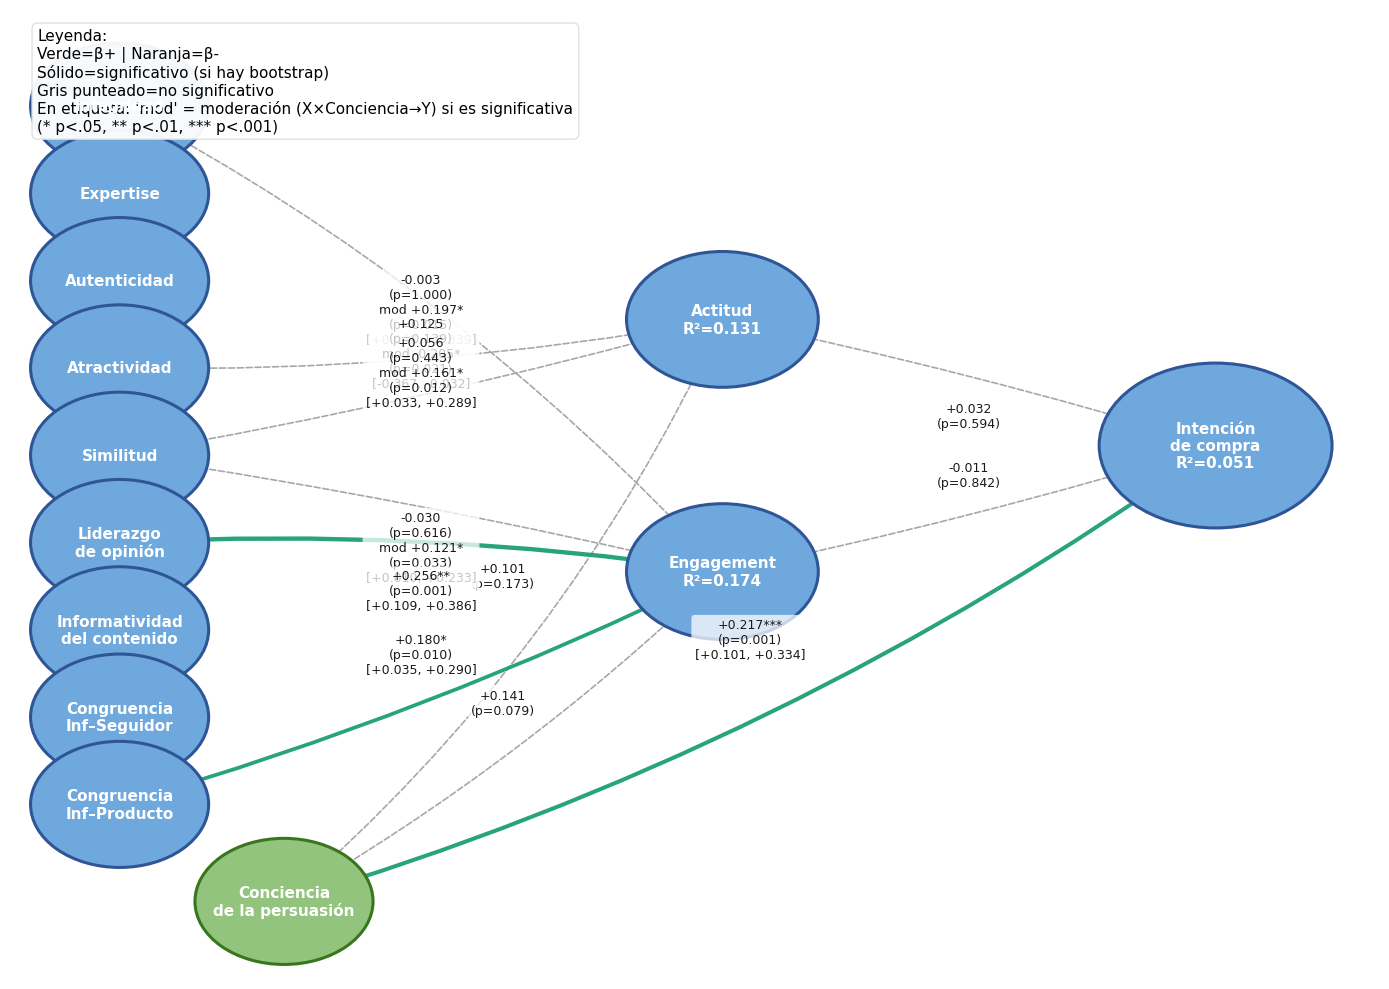

✅ Diagrama guardado como: sem_first_order_results.png

✅ Tabla bootstrap (centrada/limpia):


,Endog,Exog,Beta,CI_2.5%,CI_97.5%,p,Sig_0.05
0,predisposicion_a_comprar_un_producto,conciencia_de_la_persuasion,0.217,0.101,0.334,0.001,True
1,engagement,lider_de_opinion,0.256,0.109,0.386,0.001,True
2,engagement,congruencia_influencer_producto,0.180,0.035,0.290,0.010,True
3,engagement,integridad_x_conciencia_de_la_persuasion,0.161,0.034,0.289,0.012,True
4,actitud,atractividad_x_conciencia_de_la_persuasion,0.198,0.048,0.339,0.015,True
5,actitud,similitud_x_conciencia_de_la_persuasion,-0.205,-0.367,-0.032,0.021,True
6,engagement,similitud_x_conciencia_de_la_persuasion,0.121,0.011,0.233,0.033,True
7,engagement,conciencia_de_la_persuasion,0.141,-0.017,0.272,0.079,False
8,actitud,autenticidad_x_conciencia_de_la_persuasion,-0.147,-0.293,0.017,0.080,False
9,engagement,informatividad_del_contenido,0.092,-0.023,0.215,0.111,False


In [ ]:
# ============================================================
# SEM (SOLO 1er ORDEN) — VISUALIZACIÓN LIMPIA en Colab (sin Graphviz)
# - Nodos: SOLO constructos de 1er orden (incluye moderador)
# - Aristas: muestra SOLO efectos relevantes (sig directos y/o sig moderaciones)
# - Moderación: NO crea nodos de interacción (para cumplir “solo 1er orden”).
#   En su lugar, si X×Conciencia -> Y es significativo, lo anota en la arista X->Y.
#
# REQUIERE que ya existan en tu notebook:
#   - betas  (dict[endog][exog] = beta)  -> de tu modelo 1er orden
#   - r2s    (dict[endog] = R2)
#   - paths  (dict[endog] = lista de exogs)
#   - tabla_boot (DataFrame)  (opcional pero recomendado para p/CI/significancia)
#
# OUTPUT:
#   - sem_first_order_results.png  (diagrama)
#   - (opcional) tabla_boot limpia y centrada con display()
# ============================================================

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
from IPython.display import display

# ----------------------------
# A) CONFIGURACIÓN
# ----------------------------
MOD = "conciencia_de_la_persuasion"   # debe coincidir con tu modelo

# Qué mostrar:
SHOW_ONLY_RELEVANT_EDGES = True  # True = solo aristas que "importan" según resultados
LABEL_ONLY_RELEVANT      = True  # etiquetas solo donde vale la pena (evita saturación)
INCLUDE_CORE_PATHS       = True  # siempre incluye actitud->intención y engagement->intención
INCLUDE_MOD_DIRECT       = True  # siempre incluye MOD->(actitud, engagement, intención)
ALSO_FAINT_NONSIG        = False # si quieres ver todo, pon True (pero puede ensuciar)

# Tamaño del lienzo
FIG_W, FIG_H = 14, 10

# ----------------------------
# B) UTILIDADES bootstrap (p, CI, sig)
# ----------------------------
def _safe_float(x):
    try:
        return float(x)
    except Exception:
        return float("nan")

def _norm_boot_table(tb: pd.DataFrame) -> pd.DataFrame:
    tb = tb.copy()
    # normaliza nombres comunes
    ren = {}
    for c in tb.columns:
        c2 = c.strip()
        if c2.lower() in ["beta", "beta_orig", "beta_original"]:
            ren[c] = "Beta"
        elif c2.replace(" ", "").lower() in ["ci_2.5%", "ci2.5%", "ci_2.5", "ci2.5"]:
            ren[c] = "CI_2.5%"
        elif c2.replace(" ", "").lower() in ["ci_97.5%", "ci97.5%", "ci_97.5", "ci97.5"]:
            ren[c] = "CI_97.5%"
        elif c2.lower() in ["p", "p_emp(2-colas)", "p_emp", "p_empirico", "p_empirico(2-colas)"]:
            ren[c] = "p"
        elif c2.lower() in ["sig_0.05", "significativo_0.05", "sig", "signif_0.05"]:
            ren[c] = "Sig_0.05"
        elif c2.lower() == "endog":
            ren[c] = "Endog"
        elif c2.lower() == "exog":
            ren[c] = "Exog"
    tb = tb.rename(columns=ren)

    # limpia strings
    for col in ["Endog", "Exog"]:
        if col in tb.columns:
            tb[col] = tb[col].astype(str).str.strip()

    # asegura columnas mínimas
    need = ["Endog","Exog","Beta","CI_2.5%","CI_97.5%","p","Sig_0.05"]
    for col in need:
        if col not in tb.columns:
            # crea si no existe
            tb[col] = np.nan

    # tipado
    for col in ["Beta","CI_2.5%","CI_97.5%","p"]:
        tb[col] = tb[col].apply(_safe_float)
    tb["Sig_0.05"] = tb["Sig_0.05"].astype(str).str.lower().isin(["true","1","yes","y","t"])

    return tb[need]

sig_map, p_map, ci_map = {}, {}, {}
tb_norm = None
if "tabla_boot" in globals() and isinstance(globals()["tabla_boot"], pd.DataFrame):
    try:
        tb_norm = _norm_boot_table(globals()["tabla_boot"])
        for _, r in tb_norm.iterrows():
            k = (r["Endog"], r["Exog"])
            sig_map[k] = bool(r["Sig_0.05"])
            p_map[k]  = float(r["p"])
            ci_map[k] = (float(r["CI_2.5%"]), float(r["CI_97.5%"]))
    except Exception as e:
        print("⚠️ No pude normalizar tabla_boot:", e)

def p_stars(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return ""

def fmt_beta(b):
    if b is None or (isinstance(b, float) and (np.isnan(b) or np.isinf(b))):
        return "NA"
    return f"{b:+.3f}"

def fmt_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return "p=NA"
    return f"p={p:.3f}"

def fmt_ci(ci):
    if not ci or any(np.isnan(x) for x in ci):
        return "[CI NA]"
    return f"[{ci[0]:+.3f}, {ci[1]:+.3f}]"

# ----------------------------
# C) DEFINIR NODOS (SOLO 1er ORDEN) + etiquetas bonitas
# ----------------------------
pretty = {
    "integridad": "Integridad",
    "expertis": "Expertise",
    "autenticidad": "Autenticidad",
    "atractividad": "Atractividad",
    "similitud": "Similitud",
    "lider_de_opinion": "Liderazgo\nde opinión",
    "informatividad_del_contenido": "Informatividad\ndel contenido",
    "congruencia_influencer_follower": "Congruencia\nInf–Seguidor",
    "congruencia_influencer_producto": "Congruencia\nInf–Producto",
    MOD: "Conciencia\nde la persuasión",
    "actitud": "Actitud",
    "engagement": "Engagement",
    "predisposicion_a_comprar_un_producto": "Intención\nde compra",
}

# Columnas (layout manual para que NO se superponga)
predictors = [
    "integridad","expertis","autenticidad","atractividad","similitud",
    "lider_de_opinion","informatividad_del_contenido",
    "congruencia_influencer_follower","congruencia_influencer_producto"
]
mediators = ["actitud","engagement"]
outcome   = "predisposicion_a_comprar_un_producto"

# ----------------------------
# D) DETECTAR MODERACIONES SIGNIFICATIVAS SIN CREAR NODOS DE INTERACCIÓN
#    (si existe tabla_boot, usamos Sig_0.05; si no, no anotamos moderación)
# ----------------------------
def inter_name(x, mod=MOD):
    return f"{x}_x_{mod}"

def get_beta(endog, exog):
    try:
        return float(betas[endog][exog])
    except Exception:
        return float("nan")

def get_sig(endog, exog):
    if sig_map:
        return sig_map.get((endog, exog), None)
    return None

def get_p(endog, exog):
    if p_map:
        return p_map.get((endog, exog), float("nan"))
    return float("nan")

def get_ci(endog, exog):
    if ci_map:
        return ci_map.get((endog, exog), (float("nan"), float("nan")))
    return (float("nan"), float("nan"))

# para cada arista directa X->Y, si existe X_x_MOD -> Y significativo, lo anotamos
moderation_effect = {}  # (Y,X) -> dict(beta,p,ci,sig)
for endog, exogs in paths.items():
    for ex in exogs:
        if ex == MOD:
            continue
        # ignorar términos de interacción como nodos
        if isinstance(ex, str) and ex.endswith(f"_x_{MOD}"):
            continue
        inter = inter_name(ex)
        if inter in exogs:
            b_int = get_beta(endog, inter)
            p_int = get_p(endog, inter)
            s_int = get_sig(endog, inter)
            ci_int = get_ci(endog, inter)
            moderation_effect[(endog, ex)] = {
                "beta": b_int, "p": p_int, "sig": s_int, "ci": ci_int
            }

# ----------------------------
# E) CONSTRUIR LISTA DE ARISTAS A DIBUJAR
# ----------------------------
edges = []  # (src, dst, kind="direct")
for endog, exogs in paths.items():
    for ex in exogs:
        if isinstance(ex, str) and ex.endswith(f"_x_{MOD}"):
            continue  # NO dibujamos nodos interacción
        edges.append((ex, endog))

def edge_is_relevant(src, dst):
    # direct sig?
    s_dir = get_sig(dst, src)
    dir_sig = (s_dir is True)

    # moderation sig?
    mod = moderation_effect.get((dst, src), None)
    mod_sig = (mod is not None and mod.get("sig") is True)

    # core paths siempre
    core = False
    if INCLUDE_CORE_PATHS and (src in ["actitud","engagement"]) and (dst == outcome):
        core = True
    if INCLUDE_MOD_DIRECT and (src == MOD) and (dst in ["actitud","engagement", outcome]):
        core = True

    return (dir_sig or mod_sig or core)

edges_to_draw = []
for (src, dst) in edges:
    if SHOW_ONLY_RELEVANT_EDGES:
        if edge_is_relevant(src, dst):
            edges_to_draw.append((src, dst))
        elif ALSO_FAINT_NONSIG:
            edges_to_draw.append((src, dst))
    else:
        edges_to_draw.append((src, dst))

# ----------------------------
# F) POSICIONES (layout fijo)
# ----------------------------
pos = {}

# predictors en columna izquierda
x_pred = 0.08
ys = np.linspace(0.90, 0.18, len(predictors))
for n, y in zip(predictors, ys):
    pos[n] = (x_pred, float(y))

# mediadores centro
pos["actitud"]    = (0.52, 0.68)
pos["engagement"] = (0.52, 0.42)

# outcome derecha
pos[outcome] = (0.88, 0.55)

# moderador abajo izquierda (separado)
pos[MOD] = (0.20, 0.08)

# ----------------------------
# G) DIBUJO
# ----------------------------
def edge_style(beta, sig=None):
    # color por signo
    col = "#1B9E77" if (not np.isnan(beta) and beta >= 0) else "#D95F02"
    # si hay bootstrap: no sig -> gris punteado
    if sig is False:
        return {"color":"#9E9E9E", "lw":1.2, "ls":"dashed", "alpha":0.9}
    # sin info de sig: normal
    if sig is None:
        return {"color":col, "lw":1.6, "ls":"solid", "alpha":0.95}
    # sig True:
    # grosor por magnitud
    lw = 1.6 + min(4.0, abs(beta) * 6.0)
    return {"color":col, "lw":lw, "ls":"solid", "alpha":0.95}

def node_style(n):
    # moderador verde
    if n == MOD:
        return {"fc":"#93C47D", "ec":"#38761D", "r":0.065}
    # outcome más grande
    if n == outcome:
        return {"fc":"#6FA8DC", "ec":"#2F5597", "r":0.085}
    # mediadores
    if n in mediators:
        return {"fc":"#6FA8DC", "ec":"#2F5597", "r":0.070}
    # predictores
    return {"fc":"#6FA8DC", "ec":"#2F5597", "r":0.065}

def draw_node(ax, n):
    x,y = pos[n]
    st = node_style(n)
    circ = Circle((x,y), st["r"], facecolor=st["fc"], edgecolor=st["ec"], lw=2.2, zorder=3)
    ax.add_patch(circ)

    # label + R² si aplica
    label = pretty.get(n, n)
    if n in r2s:
        r2 = r2s.get(n, float("nan"))
        if not (np.isnan(r2) or np.isinf(r2)):
            label = f"{label}\nR²={r2:.3f}"
        else:
            label = f"{label}\nR²=NA"
    ax.text(x, y, label, ha="center", va="center", color="white", fontsize=11, fontweight=600, zorder=4)

def draw_edge(ax, src, dst, rad):
    x1,y1 = pos[src]
    x2,y2 = pos[dst]

    b = get_beta(dst, src)
    s = get_sig(dst, src)

    st = edge_style(b, s if s is not None else None)

    # flecha curva
    arrow = FancyArrowPatch(
        (x1,y1), (x2,y2),
        arrowstyle='-|>',
        mutation_scale=14,
        lw=st["lw"],
        linestyle=st["ls"],
        color=st["color"],
        alpha=st["alpha"],
        connectionstyle=f"arc3,rad={rad}",
        zorder=2
    )
    ax.add_patch(arrow)

    # etiqueta (solo si relevante)
    label = ""
    p = get_p(dst, src)
    if (not LABEL_ONLY_RELEVANT) or edge_is_relevant(src, dst):
        # direct label si: es core o sig o si quieres
        if (get_sig(dst, src) is True) or ((src in ["actitud","engagement",MOD]) or (dst in ["actitud","engagement",outcome])):
            stars = p_stars(p)
            label = f"{fmt_beta(b)}{stars}"
            if not np.isnan(p):
                label += f"\n({fmt_p(p)})"
            # añade CI direct si es sig
            if get_sig(dst, src) is True and ci_map:
                label += f"\n{fmt_ci(get_ci(dst, src))}"

    # anotación de moderación (si X×MOD -> dst es sig)
    mod = moderation_effect.get((dst, src), None)
    if mod and (mod.get("sig") is True):
        b_int = mod["beta"]
        p_int = mod["p"]
        stars_int = p_stars(p_int)
        # lo marcamos como "mod"
        label += ("" if label=="" else "\n") + f"mod {fmt_beta(b_int)}{stars_int}"
        if not np.isnan(p_int):
            label += f"\n({fmt_p(p_int)})"
        if ci_map:
            label += f"\n{fmt_ci(mod['ci'])}"

    if label.strip():
        # posición label cerca del medio, con offset según rad
        mx, my = (x1+x2)/2, (y1+y2)/2
        ax.text(mx, my + 0.035*np.sign(rad), label,
                ha="center", va="center", fontsize=9, color="#1a1a1a",
                bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.75),
                zorder=5)

# -------------- render --------------
plt.figure(figsize=(FIG_W, FIG_H))
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# nodos
for n in predictors + mediators + [outcome, MOD]:
    draw_node(ax, n)

# edges (curvatura automática por diferencia vertical)
def rad_for(src, dst):
    x1,y1 = pos[src]
    x2,y2 = pos[dst]
    dy = y2 - y1
    # rad pequeño, alterna signo para separar
    base = 0.18
    r = np.clip(dy, -0.7, 0.7) * base
    # si casi recto, agrega un poquito para evitar que se encimen
    if abs(r) < 0.02:
        r = 0.05 * (1 if (y1 < y2) else -1)
    return float(r)

for (src, dst) in edges_to_draw:
    if src not in pos or dst not in pos:
        continue
    # si queremos ver no-sig muy tenue y sin etiquetas:
    if ALSO_FAINT_NONSIG and (not edge_is_relevant(src, dst)):
        # dibuja tenue
        b = get_beta(dst, src)
        arrow = FancyArrowPatch(
            pos[src], pos[dst],
            arrowstyle='-|>', mutation_scale=10,
            lw=1.0, linestyle="dashed", color="#BDBDBD", alpha=0.55,
            connectionstyle=f"arc3,rad={rad_for(src,dst)}",
            zorder=1
        )
        ax.add_patch(arrow)
        continue

    draw_edge(ax, src, dst, rad_for(src, dst))

# leyenda
legend = (
    "Leyenda:\n"
    "Verde=β+ | Naranja=β-\n"
    "Sólido=significativo (si hay bootstrap)\n"
    "Gris punteado=no significativo\n"
    "En etiqueta: 'mod' = moderación (X×Conciencia→Y) si es significativa\n"
    "(* p<.05, ** p<.01, *** p<.001)"
)
ax.text(0.02, 0.98, legend, ha="left", va="top", fontsize=11,
        bbox=dict(boxstyle="round,pad=0.35", fc="white", ec="#e0e0e0", alpha=0.95))

plt.tight_layout()
out_png = "sem_first_order_results.png"
plt.savefig(out_png, dpi=220, bbox_inches="tight")
plt.show()
print("✅ Diagrama guardado como:", out_png)

# ----------------------------
# H) TABLA APARTE (p y CI para todos) — BIEN ALINEADA EN COLAB
# ----------------------------
if tb_norm is not None and isinstance(tb_norm, pd.DataFrame):
    tb_show = tb_norm.copy()
    # ordena por p
    tb_show = tb_show.sort_values("p", ascending=True).reset_index(drop=True)
    # redondea
    for c in ["Beta","CI_2.5%","CI_97.5%","p"]:
        tb_show[c] = tb_show[c].astype(float).round(4)
    print("\n✅ Tabla bootstrap (centrada/limpia):")
    display(tb_show)
else:
    print("\nℹ️ No detecté 'tabla_boot' (o no pude normalizarla). Solo dibujé con betas/r2s.")




*   Elemento de la lista
*   Elemento de la lista





```
# MODELADO SEM-PLS
```

# MODELADO SEM-PLS

Con constructos de segundo ORDEN

(HCM - Two Stage):

In [ ]:
# ============================
# PLS-SEM (Mode A) + HCM 2º ORDEN (Two-Stage) + MODERACIÓN PKM
# + (OPCIONAL) Bootstrap de paths (CI + p aproximado)
# Copia y pega TODO este bloque en una sola celda.
# Requisitos: ya debes tener cargado:
#   - df  (tu dataframe original)
#   - constructos_1er_orden (tu diccionario de bloques/ítems)
# ============================

import numpy as np
import pandas as pd

# ============================================================
# 0) CONFIGURACIÓN
# ============================================================
BOOTSTRAP = True      # True para CI/p; False si solo quieres betas y R²
N_BOOT = 500          # 500 rápido; 2000-5000 para tesis
SEED = 7

# ============================================================
# 1) STAGE 1: modelo plano para obtener SCORES de 1er orden (LOCs)
#    (Dimensiones -> actitud/engagement; moderación sobre intención)
# ============================================================
paths_stage1 = {
    "actitud": [
        "integridad", "expertis", "autenticidad",
        "atractividad", "similitud",
        "lider_de_opinion", "informatividad_del_contenido",
        "congruencia_influencer_follower", "congruencia_influencer_producto"
    ],
    "engagement": [
        "integridad", "expertis", "autenticidad",
        "atractividad", "similitud",
        "lider_de_opinion", "informatividad_del_contenido",
        "congruencia_influencer_follower", "congruencia_influencer_producto"
    ],
    "predisposicion_a_comprar_un_producto": [
        "actitud", "engagement",
        "conciencia_de_la_persuasion",
        "actitud_x_conciencia_de_la_persuasion",
        "engagement_x_conciencia_de_la_persuasion"
    ]
}

# ============================================================
# 2) HCM (2º ORDEN) según tu imagen
# ============================================================
hcm_map = {
    "credibilidad": ["integridad", "expertis", "autenticidad"],
    "semejanza": ["atractividad", "similitud"],
    "flujo_de_informacion": ["lider_de_opinion", "informatividad_del_contenido"],
    "congruencia": ["congruencia_influencer_follower", "congruencia_influencer_producto"],
}

# ============================================================
# 3) STAGE 2: modelo REAL (HOCs -> actitud/engagement -> intención) + moderación PKM
# ============================================================
paths_stage2 = {
    "actitud": ["credibilidad", "semejanza", "flujo_de_informacion", "congruencia"],
    "engagement": ["credibilidad", "semejanza", "flujo_de_informacion", "congruencia"],
    "predisposicion_a_comprar_un_producto": [
        "actitud", "engagement",
        "conciencia_de_la_persuasion",
        "actitud_x_conciencia_de_la_persuasion",
        "engagement_x_conciencia_de_la_persuasion"
    ]
}

# ============================================================
# 4) PREPARA df_analisis (solo columnas necesarias + limpieza robusta)
# ============================================================
def preparar_df_para_pls(df, constructos):
    cols = [it for items in constructos.values() for it in items]
    faltan = [c for c in cols if c not in df.columns]
    if faltan:
        raise ValueError(f"Faltan columnas en tu df: {faltan}")

    df2 = df[cols].copy()
    df2 = df2.apply(pd.to_numeric, errors="coerce")
    df2 = df2.replace([np.inf, -np.inf], np.nan)

    nun = df2.nunique(dropna=True)
    const_cols = nun[nun <= 1].index.tolist()
    if const_cols:
        print("⚠️ Columnas constantes/sin datos (se eliminan):", const_cols)
        df2 = df2.drop(columns=const_cols)

    nan_before = df2.isna().sum().sum()
    if nan_before > 0:
        df2 = df2.apply(lambda s: s.fillna(s.mean()))
        nan_after = df2.isna().sum().sum()
        print(f"✅ Imputación NaN: antes={nan_before}, después={nan_after}")

    if not np.isfinite(df2.to_numpy()).all():
        df2 = df2.replace([np.inf, -np.inf], np.nan).apply(lambda s: s.fillna(s.mean()))
        if not np.isfinite(df2.to_numpy()).all():
            raise ValueError("Aún hay valores no finitos en df_analisis (NaN/Inf).")

    print("✅ df_analisis listo. Shape:", df2.shape)
    return df2

df_analisis = preparar_df_para_pls(df, constructos_1er_orden)

# ============================================================
# 5) FUNCIONES PLS Mode A + Moderación (robustas)
# ============================================================
def zscore_df(df):
    mu = df.mean()
    sd = df.std(ddof=0).replace(0, 1)
    out = (df - mu) / sd
    out = out.replace([np.inf, -np.inf], np.nan)
    return out.fillna(0)

def ols_beta(X, y):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1, 1)
    mask = np.isfinite(X).all(axis=1) & np.isfinite(y).ravel()
    X = X[mask]; y = y[mask]
    if X.shape[0] < X.shape[1] + 2:
        return np.full(X.shape[1], np.nan), np.nan

    X1 = np.column_stack([np.ones(len(X)), X])
    try:
        b = np.linalg.lstsq(X1, y, rcond=None)[0]
    except np.linalg.LinAlgError:
        lam = 1e-6
        XtX = X1.T @ X1 + lam * np.eye(X1.shape[1])
        b = np.linalg.solve(XtX, X1.T @ y)

    yhat = X1 @ b
    ssr = ((y - yhat) ** 2).sum()
    sst = ((y - y.mean()) ** 2).sum()
    r2 = 1 - (ssr / sst) if sst > 0 else np.nan
    return b[1:].flatten(), float(r2)

def init_outer_weights(cols):
    return np.ones(len(cols)) / max(len(cols), 1)

def latent_scores(dfZ, blocks, outer_w):
    scores = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        if len(cols_ok) == 0:
            raise ValueError(f"El constructo '{c}' se quedó sin ítems.")
        X = dfZ[cols_ok].to_numpy()

        w = outer_w[c]
        if len(w) != len(cols_ok):
            w = np.ones(len(cols_ok)) / len(cols_ok)
        w = w.reshape(-1, 1)

        lv = (X @ w).flatten()
        lv = (lv - lv.mean()) / (lv.std(ddof=0) + 1e-12)
        scores[c] = lv

        outer_w[c] = (w.flatten() / (np.linalg.norm(w) + 1e-12))
    return pd.DataFrame(scores), outer_w

def update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred):
    new_w = {}
    for c, cols in blocks.items():
        cols_ok = [x for x in cols if x in dfZ.columns]
        X = dfZ[cols_ok].to_numpy()
        ref = inner_pred.get(c, LV_base[c].to_numpy()).reshape(-1, 1)

        w = []
        for j in range(X.shape[1]):
            xj = X[:, [j]]
            num = float((xj * ref).mean())
            den = float(xj.std(ddof=0) * ref.std(ddof=0) + 1e-12)
            w.append(num / den)

        w = np.array(w, dtype=float)
        w = w / (np.linalg.norm(w) + 1e-12)
        new_w[c] = w
    return new_w

def inner_estimates_with_moderation(LV_base, paths):
    LV = LV_base.copy()

    # interacciones PKM (two-stage)
    LV["actitud_x_conciencia_de_la_persuasion"] = LV["actitud"] * LV["conciencia_de_la_persuasion"]
    LV["engagement_x_conciencia_de_la_persuasion"] = LV["engagement"] * LV["conciencia_de_la_persuasion"]

    for col in ["actitud_x_conciencia_de_la_persuasion", "engagement_x_conciencia_de_la_persuasion"]:
        LV[col] = (LV[col] - LV[col].mean()) / (LV[col].std(ddof=0) + 1e-12)

    preds, betas, r2s = {}, {}, {}
    for endog, exogs in paths.items():
        X = LV[exogs].to_numpy()
        y = LV[endog].to_numpy()
        b, r2 = ols_beta(X, y)
        betas[endog] = dict(zip(exogs, b))
        r2s[endog] = r2

        yhat = X @ b
        yhat = (yhat - yhat.mean()) / (yhat.std(ddof=0) + 1e-12)
        preds[endog] = yhat

    return preds, betas, r2s, LV

def pls_scores_modeA(df, blocks, paths, max_iter=200, tol=1e-7, verbose=False):
    dfZ = zscore_df(df)
    outer_w = {c: init_outer_weights([x for x in cols if x in dfZ.columns]) for c, cols in blocks.items()}

    for it in range(max_iter):
        LV_base, outer_w = latent_scores(dfZ, blocks, outer_w)
        inner_pred, _, _, _ = inner_estimates_with_moderation(LV_base, paths)
        new_w = update_outer_weights_modeA(dfZ, blocks, LV_base, inner_pred)

        deltas = []
        for c in blocks.keys():
            w_old = outer_w[c]; w_new = new_w[c]
            m = min(len(w_old), len(w_new))
            deltas.append(np.max(np.abs(w_new[:m] - w_old[:m])))
        change = float(np.max(deltas)) if deltas else np.nan

        outer_w = new_w
        if verbose and (it % 20 == 0 or change < tol):
            print(f"Iter {it:03d} | max Δw = {change:.2e}")
        if change < tol:
            break

    LV_base, _ = latent_scores(zscore_df(df), blocks, outer_w)
    _, _, _, LV_full = inner_estimates_with_moderation(LV_base, paths)
    return LV_full, outer_w

# ============================================================
# 6) STAGE 2: construir HOCs + estimar estructura final
# ============================================================
def build_stage2_latents(LV_stage1, hcm_map):
    LV2 = LV_stage1.copy()

    # HOCs como promedio estandarizado de LOCs (scores)
    for hoc, locs in hcm_map.items():
        for loc in locs:
            if loc not in LV2.columns:
                raise ValueError(f"Falta '{loc}' para construir '{hoc}'.")
        comp = LV2[locs].mean(axis=1)
        LV2[hoc] = (comp - comp.mean()) / (comp.std(ddof=0) + 1e-12)

    # interacciones PKM (en stage 2)
    LV2["actitud_x_conciencia_de_la_persuasion"] = LV2["actitud"] * LV2["conciencia_de_la_persuasion"]
    LV2["engagement_x_conciencia_de_la_persuasion"] = LV2["engagement"] * LV2["conciencia_de_la_persuasion"]
    for col in ["actitud_x_conciencia_de_la_persuasion", "engagement_x_conciencia_de_la_persuasion"]:
        LV2[col] = (LV2[col] - LV2[col].mean()) / (LV2[col].std(ddof=0) + 1e-12)

    return LV2

def estimate_structural(LV2, paths):
    betas, r2s = {}, {}
    for endog, exogs in paths.items():
        X = LV2[exogs].to_numpy()
        y = LV2[endog].to_numpy()
        b, r2 = ols_beta(X, y)
        betas[endog] = dict(zip(exogs, b))
        r2s[endog] = r2
    return betas, r2s

# ============================================================
# 7) EJECUTA (ORIGINAL) y muestra resultados STAGE 2
# ============================================================
LV_stage1, outer_w = pls_scores_modeA(df_analisis, constructos_1er_orden, paths_stage1, verbose=False)
LV_stage2 = build_stage2_latents(LV_stage1, hcm_map)
betas2, r2s2 = estimate_structural(LV_stage2, paths_stage2)

print("\n====================")
print("STAGE 2 (Modelo como tu imagen) - R²")
print("====================")
for k, v in r2s2.items():
    print(f"{k}: {v:.3f}")

print("\n====================")
print("STAGE 2 - PATH COEFFICIENTS β")
print("====================")
for endog, exogs in paths_stage2.items():
    print(f"\n{endog} (R²={r2s2[endog]:.3f})")
    for ex in exogs:
        print(f"  {ex:40s} -> {endog:35s}  β={betas2[endog][ex]:+.3f}")

print("\n====================")
print("STAGE 2 - MODERACIÓN (lo clave)")
print("====================")
b4 = betas2["predisposicion_a_comprar_un_producto"]["actitud_x_conciencia_de_la_persuasion"]
b5 = betas2["predisposicion_a_comprar_un_producto"]["engagement_x_conciencia_de_la_persuasion"]
print(f"β(Actitud×conciencia de la persuasión -> Intención)     = {b4:+.3f}  (esperas NEGATIVO)")
print(f"β(Engagement×conciencia de la persuasión -> Intención)  = {b5:+.3f}  (esperas NEGATIVO)")


# ============================================================
# 8) BOOTSTRAP (OPCIONAL) para CI/p de los β del STAGE 2
# ============================================================
def bootstrap_stage2(df_analisis, blocks, paths_stage1, hcm_map, paths_stage2, B=5000, seed=7):
    rng = np.random.default_rng(seed)

    # original
    LV1_orig, _ = pls_scores_modeA(df_analisis, blocks, paths_stage1, verbose=False)
    LV2_orig = build_stage2_latents(LV1_orig, hcm_map)
    betas_orig, r2_orig = estimate_structural(LV2_orig, paths_stage2)

    edges = []
    for endog, exogs in paths_stage2.items():
        for ex in exogs:
            edges.append((endog, ex))

    boot = {e: [] for e in edges}

    n = len(df_analisis)
    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        sample = df_analisis.iloc[idx].reset_index(drop=True)

        LV1_b, _ = pls_scores_modeA(sample, blocks, paths_stage1, verbose=False)
        LV2_b = build_stage2_latents(LV1_b, hcm_map)
        betas_b, _ = estimate_structural(LV2_b, paths_stage2)

        for (endog, exog) in edges:
            boot[(endog, exog)].append(float(betas_b[endog][exog]))

    rows = []
    for (endog, exog) in edges:
        dist = np.array(boot[(endog, exog)], dtype=float)
        b0 = float(betas_orig[endog][exog])
        se = float(np.nanstd(dist, ddof=1))
        t = (b0 / se) if se > 0 else np.nan
        p_emp = 2 * min(np.mean(dist <= 0), np.mean(dist >= 0))
        ci_low = float(np.nanpercentile(dist, 2.5))
        ci_high = float(np.nanpercentile(dist, 97.5))

        rows.append({
            "Endog": endog,
            "Exog": exog,
            "Beta_orig": b0,
            "CI_2.5%": ci_low,
            "CI_97.5%": ci_high,
            "SE_boot": se,
            "t_boot": float(t),
            "p_emp(2-colas)": float(p_emp),
            "Significativo_0.05": (p_emp < 0.05)
        })

    return pd.DataFrame(rows).sort_values(by="p_emp(2-colas)")

if BOOTSTRAP:
    print("\n====================")
    print(f"BOOTSTRAP STAGE 2 (B={N_BOOT})")
    print("====================")
    tabla_boot = bootstrap_stage2(
        df_analisis, constructos_1er_orden,
        paths_stage1, hcm_map, paths_stage2,
        B=N_BOOT, seed=SEED
    )
    pd.options.display.float_format = "{:.4f}".format
    print(tabla_boot)

print("\n✅ Listo: este bloque implementa HCM 2º orden + moderación PKM + (opcional) bootstrap.")


✅ Imputación NaN: antes=8, después=0
✅ df_analisis listo. Shape: (240, 47)

STAGE 2 (Modelo como tu imagen) - R²
actitud: 0.014
engagement: 0.060
predisposicion_a_comprar_un_producto: 0.051

STAGE 2 - PATH COEFFICIENTS β

actitud (R²=0.014)
  credibilidad                             -> actitud                              β=+0.063
  semejanza                                -> actitud                              β=+0.093
  flujo_de_informacion                     -> actitud                              β=+0.039
  congruencia                              -> actitud                              β=+0.010

engagement (R²=0.060)
  credibilidad                             -> engagement                           β=-0.025
  semejanza                                -> engagement                           β=-0.010
  flujo_de_informacion                     -> engagement                           β=+0.218
  congruencia                              -> engagement                           β=+0.091


In [ ]:
# ============================
# SEM mejorado (Graphviz): layout limpio + tamaños fijos + color por signo
# + (opcional) estilo por significancia si existe "tabla_boot"
# Requiere: betas2, r2s2, paths_stage2 (y opcional tabla_boot)
# Salida: sem_stage2_pretty.png
# ============================

import math
from graphviz import Digraph

# --------- 1) Labels bonitos y cortos ---------
pretty = {
    "credibilidad": "Credibilidad",
    "semejanza": "Semejanza",
    "flujo_de_informacion": "Flujo de información",
    "congruencia": "Congruencia",
    "actitud": "Actitud",
    "engagement": "Engagement",
    "predisposicion_a_comprar_un_producto": "Intención de compra",
    "conciencia_de_la_persuasion": "Conciencia de la persuasión",
    "actitud_x_conciencia_de_la_persuasion": "Actitud × Conciencia",
    "engagement_x_conciencia_de_la_persuasion": "Engagement × Conciencia",
}

exo = ["flujo_de_informacion", "semejanza", "credibilidad", "congruencia"]
med = ["engagement", "actitud"]
end = ["predisposicion_a_comprar_un_producto"]
mod = "conciencia_de_la_persuasion"
inter = ["actitud_x_conciencia_de_la_persuasion", "engagement_x_conciencia_de_la_persuasion"]

# --------- 2) Significancia opcional (si existe tabla_boot) ---------
sig_map = {}
p_map = {}
if "tabla_boot" in globals() and isinstance(globals()["tabla_boot"], object):
    try:
        tb = globals()["tabla_boot"].copy()
        # esperamos columnas: Endog, Exog, Significativo_0.05, p_emp(2-colas)
        for _, r in tb.iterrows():
            sig_map[(r["Endog"], r["Exog"])] = bool(r.get("Significativo_0.05", False))
            p_map[(r["Endog"], r["Exog"])] = float(r.get("p_emp(2-colas)", float("nan")))
    except Exception:
        pass

def fmt_beta(b):
    if b is None or (isinstance(b, float) and (math.isnan(b) or math.isinf(b))):
        return "NA"
    return f"{b:+.3f}"

def fmt_r2(x):
    if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))):
        return "R²=NA"
    return f"R²={x:.3f}"

def edge_style(beta, significant=None):
    """Color por signo, grosor por magnitud, y si hay significancia: gris punteado cuando no."""
    if beta is None or (isinstance(beta, float) and (math.isnan(beta) or math.isinf(beta))):
        return {"color":"#999999", "style":"dashed", "penwidth":"1.2"}

    # grosor por magnitud (cap)
    pw = 1.2 + min(4.0, abs(beta) * 6.0)   # ajusta si quieres más/menos
    color = "#1B9E77" if beta >= 0 else "#D95F02"  # verde/rojo

    if significant is False:
        return {"color":"#9E9E9E", "style":"dashed", "penwidth":str(max(1.1, pw-0.6))}
    return {"color":color, "style":"solid", "penwidth":str(pw)}

# --------- 3) Crear grafo con layout en capas ---------
dot = Digraph("SEM_STAGE2_PRETTY", format="png")

dot.attr(
    rankdir="LR",
    bgcolor="white",
    splines="spline",
    concentrate="true",
    nodesep="0.55",
    ranksep="0.95",
    pad="0.25"
)

# ---- estilo base nodos latentes ----
dot.attr("node",
         shape="circle",
         style="filled",
         fillcolor="#6FA8DC",
         color="#2F5597",
         fontname="Arial",
         fontsize="11",
         fontcolor="white",
         fixedsize="true",
         width="1.55",
         height="1.55")

# exógenas
for n in exo:
    dot.node(n, label=pretty.get(n, n))

# mediadores (con R² si existe)
for n in med:
    lab = pretty.get(n, n)
    if n in r2s2:
        lab = f"{lab}\n{fmt_r2(r2s2[n])}"
    dot.node(n, label=lab)

# endógena final (más grande)
dot.attr("node", width="2.05", height="2.05")
n = end[0]
lab = f"{pretty.get(n, n)}\n{fmt_r2(r2s2.get(n, float('nan')))}"
dot.node(n, label=lab)

# moderador (verde)
dot.attr("node", width="1.75", height="1.75", fillcolor="#93C47D", color="#38761D")
dot.node(mod, label=pretty.get(mod, mod))

# interacciones (más pequeñas y NO gigantes)
dot.attr("node", width="1.85", height="1.15", shape="box", style="rounded,filled", fillcolor="#6FA8DC", color="#2F5597")
for n in inter:
    dot.node(n, label=pretty.get(n, n))

# --------- 4) Subgrafos para ordenar por columnas ---------
with dot.subgraph() as s:
    s.attr(rank="same")
    for n in exo:
        s.node(n)

with dot.subgraph() as s:
    s.attr(rank="same")
    for n in med:
        s.node(n)

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node(end[0])

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node(mod)

with dot.subgraph() as s:
    s.attr(rank="same")
    for n in inter:
        s.node(n)

# --------- 5) Dibujar paths con betas (Stage 2) ---------
dot.attr("edge", fontname="Arial", fontsize="10", arrowsize="0.9")

for endog, exogs in paths_stage2.items():
    for ex in exogs:
        beta = betas2.get(endog, {}).get(ex, None)
        signif = sig_map.get((endog, ex), None) if sig_map else None
        st = edge_style(beta, signif)

        # etiqueta beta + (si hay p) agrega p pequeño
        lab = fmt_beta(beta)
        if (endog, ex) in p_map and not math.isnan(p_map[(endog, ex)]):
            lab = f"{lab}\n(p={p_map[(endog, ex)]:.3f})"

        dot.edge(ex, endog, label=lab, color=st["color"], style=st["style"], penwidth=st["penwidth"])

# --------- 6) Moderación (líneas rojas punteadas del moderador a interacciones) ---------
dot.attr("edge", color="red", style="dashed", penwidth="1.6")
dot.edge(mod, "actitud_x_conciencia_de_la_persuasion", label="")
dot.edge(mod, "engagement_x_conciencia_de_la_persuasion", label="")

# --------- 7) Render ---------
out = dot.render("sem_stage2_pretty", cleanup=True)
print("✅ Listo. Archivo generado:", out)


✅ Listo. Archivo generado: sem_stage2_pretty.png


In [ ]:
# ============================
# DIAGRAMA SEM "RICO" (FIX): β + p + CI + f² (y opcional VIF)
# Evita AttributeError usando dict en vez de itertuples()
# Requiere: betas2, r2s2, paths_stage2, df_paths_ext
# Salida: sem_stage2_rich.png
# ============================

import numpy as np
import math
from graphviz import Digraph

# -------- helpers ----------
def safe_float(x):
    try:
        x = float(x)
        if math.isnan(x) or math.isinf(x):
            return np.nan
        return x
    except:
        return np.nan

def stars_from_p(p):
    if p is None or math.isnan(p):
        return ""
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return ""

def edge_style(beta, sig):
    # color por signo, grosor por |β|, si no sig -> gris punteado
    if beta is None or math.isnan(beta):
        return {"color":"#9E9E9E", "style":"dashed", "penwidth":"1.2"}
    pw = 1.2 + min(4.0, abs(beta)*6.0)
    col = "#1B9E77" if beta >= 0 else "#D95F02"
    if sig is False:
        return {"color":"#9E9E9E", "style":"dashed", "penwidth":str(max(1.1, pw-0.6))}
    return {"color":col, "style":"solid", "penwidth":str(pw)}

# -------- etiquetas cortas ----------
pretty = {
    "credibilidad": "Credibilidad",
    "semejanza": "Semejanza",
    "flujo_de_informacion": "Flujo de información",
    "congruencia": "Congruencia",
    "actitud": "Actitud",
    "engagement": "Engagement",
    "predisposicion_a_comprar_un_producto": "Intención de compra",
    "conciencia_de_la_persuasion": "Conciencia de la persuasión",
    "actitud_x_conciencia_de_la_persuasion": "Actitud × Conciencia",
    "engagement_x_conciencia_de_la_persuasion": "Engagement × Conciencia",
}

exo = ["credibilidad", "semejanza", "flujo_de_informacion", "congruencia"]
med = ["actitud", "engagement"]
end = ["predisposicion_a_comprar_un_producto"]
mod = "conciencia_de_la_persuasion"
inter = ["actitud_x_conciencia_de_la_persuasion", "engagement_x_conciencia_de_la_persuasion"]

def fmt_node(n):
    base = pretty.get(n, n)
    if n in r2s2:
        return f"{base}\nR²={r2s2[n]:.3f}"
    return base

# --------- indexar df_paths_ext como dict (robusto) ----------
# clave: (Endog, Exog) -> dict con valores de columnas
key_index = {}
for _, r in df_paths_ext.iterrows():
    key_index[(r["Endog"], r["Exog"])] = r.to_dict()

# toggles para no saturar etiquetas
SHOW_CI = True
SHOW_F2 = True
SHOW_VIF = False  # pon True si lo quieres (a veces satura)

# --------- crear grafo ----------
dot = Digraph("SEM_STAGE2_RICH", format="png")
dot.attr(rankdir="LR", splines="spline", nodesep="0.6", ranksep="1.0", pad="0.25")

# nodos latentes (círculos)
dot.attr("node", shape="circle", style="filled", fixedsize="true",
         width="1.65", height="1.65", fontname="Arial", fontsize="11",
         fillcolor="#6FA8DC", color="#2F5597", fontcolor="white")

for n in exo + med:
    dot.node(n, label=fmt_node(n))

# endógena final más grande
dot.attr("node", width="2.10", height="2.10")
dot.node(end[0], label=fmt_node(end[0]))

# moderador verde
dot.attr("node", width="1.75", height="1.75", fillcolor="#93C47D", color="#38761D")
dot.node(mod, label=pretty.get(mod, mod))

# interacciones como cajas
dot.attr("node", shape="box", style="rounded,filled", width="2.05", height="0.9",
         fillcolor="#6FA8DC", color="#2F5597", fontcolor="white")
for n in inter:
    dot.node(n, label=pretty.get(n, n))

# ranks por columnas
with dot.subgraph() as s:
    s.attr(rank="same")
    for n in exo: s.node(n)
with dot.subgraph() as s:
    s.attr(rank="same")
    for n in med: s.node(n)
with dot.subgraph() as s:
    s.attr(rank="same"); s.node(end[0])
with dot.subgraph() as s:
    s.attr(rank="same"); s.node(mod)
with dot.subgraph() as s:
    s.attr(rank="same")
    for n in inter: s.node(n)

# edges
dot.attr("edge", fontname="Arial", fontsize="10", arrowsize="0.9")

for endog, exogs in paths_stage2.items():
    for ex in exogs:
        row = key_index.get((endog, ex), {})  # dict con columnas, o vacío
        beta = safe_float(betas2.get(endog, {}).get(ex, np.nan))

        # estas claves EXISTEN tal como en df_paths_ext
        p = safe_float(row.get("p_emp(2-colas)", np.nan))
        sig = row.get("Sig_0.05", None)      # True/False o None
        ci_lo = safe_float(row.get("CI_2.5%", np.nan))
        ci_hi = safe_float(row.get("CI_97.5%", np.nan))
        f2 = safe_float(row.get("f2", np.nan))
        vif = safe_float(row.get("VIF", np.nan))

        st = edge_style(beta, sig if sig is not None else True)

        # etiqueta
        lab = f"{beta:+.3f}{stars_from_p(p)}"
        if not math.isnan(p): lab += f"\n(p={p:.3f})"
        if SHOW_CI and (not math.isnan(ci_lo) and not math.isnan(ci_hi)):
            lab += f"\n[{ci_lo:+.3f}, {ci_hi:+.3f}]"
        if SHOW_F2 and (not math.isnan(f2)):
            lab += f"\nf²={f2:.3f}"
        if SHOW_VIF and (not math.isnan(vif)):
            lab += f"\nVIF={vif:.2f}"

        dot.edge(ex, endog, label=lab, color=st["color"], style=st["style"], penwidth=st["penwidth"])

# moderación (rojo punteado desde conciencia a interacciones)
dot.attr("edge", color="red", style="dashed", penwidth="1.6")
dot.edge(mod, inter[0], label="")
dot.edge(mod, inter[1], label="")

out = dot.render("sem_stage2_rich", cleanup=True)
print("✅ Diagrama generado:", out)


✅ Diagrama generado: sem_stage2_rich.png
